# Metrics Evaluation

In [5]:
%cd logs/


/Users/alexanderfrummet/Documents/GitHub/cooking-with-context/experiment/logs


In [2]:
!pip install pingouin
!pip install scikit-posthocs

In [6]:
import os
import pandas as pd
from pprint import pprint
import numpy as np
import pingouin as pg
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scikit_posthocs as sp
import statsmodels.api as sa


In [8]:
def create_metrics_table_seq2seq(base_dir, need_type, document_rep, query_rep, context_window, model_type):
    path = os.path.join("seq2seq_models", base_dir, need_type, document_rep, query_rep, context_window, model_type)
    
    overall_metrics_df = pd.DataFrame()# Dictionary to store results for each fold
    
    for fold_folder in os.listdir(path):
        fold_path = os.path.join(path, fold_folder)
        
        version_folders = os.listdir(fold_path)
        version_folders = [folder for folder in version_folders if folder.startswith('version_') and folder != '.ipynb_checkpoints']
        version_folders.sort(key=lambda x: int(x.split('_')[1]) if x.split('_')[1].isdigit() else -1)  # Sort by version number or keep non-numeric names at the end
        
        if not version_folders:
            continue  # Skip if no valid version folders
        
        latest_version_folder = version_folders[-1]
        version_path = os.path.join(fold_path, latest_version_folder)

        metrics_file = os.path.join(version_path, 'test_qa_metrics.csv')
        
        if os.path.isfile(metrics_file):
            metrics_df = pd.read_csv(metrics_file)
            overall_metrics_df = pd.concat([overall_metrics_df, metrics_df], ignore_index=True)

    overall_metrics_df['document_representation'] = document_rep
    overall_metrics_df['context_window'] = context_window
    overall_metrics_df['query_rep'] = query_rep
    overall_metrics_df['model_type'] = model_type
    return overall_metrics_df

def create_metrics_table_llama(base_dir, need_type, document_rep, context_window, query_rep):
    path = os.path.join("llama3_finetuned", base_dir, need_type, document_rep, context_window, query_rep)
    
    overall_metrics_df = pd.DataFrame()# Dictionary to store results for each fold
    
    metrics_file = os.path.join(path, 'all_folds.csv')

    if os.path.isfile(metrics_file):
        metrics_df = pd.read_csv(metrics_file)
        overall_metrics_df = pd.concat([overall_metrics_df, metrics_df], ignore_index=True)

    overall_metrics_df['document_representation'] = document_rep
    overall_metrics_df['context_window'] = context_window
    overall_metrics_df['query_rep'] = query_rep
    overall_metrics_df['model_type'] = 'llama3'
    return overall_metrics_df


In [34]:
def compare_models(*columns, model_names=None):
    if len(columns) != len(model_names):
        raise ValueError("Number of columns and model names must match.")
    
    # Perform one-way ANOVA test
    all_rep = stats.f_oneway(*columns)
    display(all_rep)

    # Create DataFrame
    data = {model_names[i]: column for i, column in enumerate(columns)}
    all_rep_df = pd.DataFrame(data)
    display(all_rep_df.describe())

    # Reshape DataFrame for post-hoc analysis
    all_rep_df = pd.melt(all_rep_df, var_name='model_type', value_name='value')

    # Perform post-hoc Tukey's test
    all_rep_posthoc = sp.posthoc_ttest(all_rep_df, val_col='value', group_col='model_type', p_adjust="holm")
    display(all_rep_posthoc)
    
    
def compare_llama_models(*columns, document_type):
    if len(columns) != len(document_type):
        raise ValueError("Number of columns and model names must match.")
    
    # Create DataFrame
    data = {document_type[i]: column for i, column in enumerate(columns)}
    all_rep_df = pd.DataFrame(data)
    display(all_rep_df.describe())
    
    # Perform paired t-test
    all_rep = pg.ttest(*columns, paired=True)
    display(all_rep)


# Evaluating the QookA Dataset
In this section, the training results on the QookA dataset are reviewed and statistically analysed.


## QookA: All Needs

In [13]:
### Seq-2-Seq Models ###
all_needs_qooka_t5_metrics = create_metrics_table_seq2seq('all_needs','qooka', 'document','prepend_context','n_0','t5')
all_needs_qooka_monoqa_node_metrics = create_metrics_table_seq2seq('all_needs','qooka','node','prepend_context','n_0','monoqa')
all_needs_qooka_monoqa_step_metrics = create_metrics_table_seq2seq('all_needs','qooka','step','prepend_context','n_0','monoqa')

all_needs_qooka_t5_prepend_n2_metrics = create_metrics_table_seq2seq('all_needs','qooka', 'document','prepend_context','n_2','t5')
all_needs_qooka_monoqa_prepend_n2_step_metrics = create_metrics_table_seq2seq('all_needs','qooka', 'step','prepend_context','n_2','monoqa')
all_needs_qooka_monoqa_prepend_n2_node_metrics = create_metrics_table_seq2seq('all_needs','qooka', 'node', 'prepend_context', 'n_2', 'monoqa')

all_needs_qooka_t5_quretec_n2_metrics = create_metrics_table_seq2seq('all_needs','qooka','document','quretec_expansion','n_2','t5')
all_needs_qooka_monoqa_quretec_n2_step_metrics = create_metrics_table_seq2seq('all_needs','qooka','step','quretec_expansion','n_2','monoqa')
all_needs_qooka_monoqa_quretec_n2_node_metrics = create_metrics_table_seq2seq('all_needs','qooka','node', 'quretec_expansion', 'n_2', 'monoqa')

all_needs_qooka_t5_canard_n2_metrics = create_metrics_table_seq2seq('all_needs','qooka', 'document','canard_rewritten','n_2','t5')
all_needs_qooka_monoqa_canard_n2_step_metrics = create_metrics_table_seq2seq('all_needs','qooka', 'step','canard_rewritten','n_2','monoqa')
all_needs_qooka_monoqa_canard_n2_node_metrics = create_metrics_table_seq2seq('all_needs','qooka',  'node', 'canard_rewritten', 'n_2', 'monoqa')

all_needs_qooka_t5_prepend_n3_metrics = create_metrics_table_seq2seq('all_needs','qooka', 'document','prepend_context','n_3','t5')
all_needs_qooka_monoqa_prepend_n3_step_metrics = create_metrics_table_seq2seq('all_needs','qooka', 'step','prepend_context','n_3','monoqa')
all_needs_qooka_monoqa_prepend_n3_node_metrics = create_metrics_table_seq2seq('all_needs','qooka',  'node', 'prepend_context', 'n_3', 'monoqa')

all_needs_qooka_t5_quretec_n3_metrics = create_metrics_table_seq2seq('all_needs','qooka', 'document','quretec_expansion','n_3','t5')
all_needs_qooka_monoqa_quretec_n3_step_metrics = create_metrics_table_seq2seq('all_needs','qooka','step','quretec_expansion','n_3','monoqa')
all_needs_qooka_monoqa_quretec_n3_node_metrics = create_metrics_table_seq2seq('all_needs','qooka', 'node', 'quretec_expansion', 'n_3', 'monoqa')

all_needs_qooka_t5_canard_n3_metrics = create_metrics_table_seq2seq('all_needs','qooka', 'document','canard_rewritten','n_3','t5')
all_needs_qooka_monoqa_canard_n3_step_metrics = create_metrics_table_seq2seq('all_needs','qooka', 'step','canard_rewritten','n_3','monoqa')
all_needs_qooka_monoqa_canard_n3_node_metrics = create_metrics_table_seq2seq('all_needs','qooka',  'node', 'canard_rewritten', 'n_3', 'monoqa')

all_needs_qooka_t5_prepend_nall_metrics = create_metrics_table_seq2seq('all_needs','qooka', 'document','prepend_context','n_all','t5')
all_needs_qooka_monoqa_prepend_nall_step_metrics = create_metrics_table_seq2seq('all_needs','qooka', 'step','prepend_context','n_all','monoqa')
all_needs_qooka_monoqa_prepend_nall_node_metrics = create_metrics_table_seq2seq('all_needs','qooka', 'node','prepend_context','n_all','monoqa')

all_needs_qooka_t5_quretec_nall_metrics = create_metrics_table_seq2seq('all_needs','qooka', 'document','quretec_expansion','n_all','t5')
all_needs_qooka_monoqa_quretec_nall_step_metrics = create_metrics_table_seq2seq('all_needs','qooka', 'step','quretec_expansion','n_all','monoqa')
all_needs_qooka_monoqa_quretec_nall_node_metrics = create_metrics_table_seq2seq('all_needs','qooka', 'node','quretec_expansion','n_all','monoqa')

all_needs_qooka_t5_canard_nall_metrics = create_metrics_table_seq2seq('all_needs','qooka', 'document','canard_rewritten','n_all','t5')
all_needs_qooka_monoqa_canard_nall_step_metrics = create_metrics_table_seq2seq('all_needs','qooka', 'step','canard_rewritten','n_all','monoqa')
all_needs_qooka_monoqa_canard_nall_node_metrics = create_metrics_table_seq2seq('all_needs','qooka', 'node', 'canard_rewritten', 'n_all', 'monoqa')

all_needs_qooka_fid_prepend_n0_step_metrics = create_metrics_table_seq2seq('all_needs', 'qooka', 'step', 'prepend_context', 'n_0', 'fid')
all_needs_qooka_fid_prepend_n2_step_metrics = create_metrics_table_seq2seq('all_needs', 'qooka', 'step', 'prepend_context', 'n_2', 'fid')
all_needs_qooka_fid_prepend_n3_step_metrics = create_metrics_table_seq2seq('all_needs', 'qooka', 'step', 'prepend_context', 'n_3', 'fid')
all_needs_qooka_fid_prepend_nall_step_metrics = create_metrics_table_seq2seq('all_needs', 'qooka', 'step', 'prepend_context', 'n_all', 'fid')

all_needs_qooka_fid_prepend_n0_node_metrics = create_metrics_table_seq2seq('all_needs', 'qooka', 'node', 'prepend_context', 'n_0', 'fid')
all_needs_qooka_fid_prepend_n2_node_metrics = create_metrics_table_seq2seq('all_needs', 'qooka', 'node', 'prepend_context', 'n_2', 'fid')
all_needs_qooka_fid_prepend_n3_node_metrics = create_metrics_table_seq2seq('all_needs', 'qooka', 'node', 'prepend_context', 'n_3', 'fid')
all_needs_qooka_fid_prepend_nall_node_metrics = create_metrics_table_seq2seq('all_needs', 'qooka', 'node', 'prepend_context', 'n_all', 'fid')

### Llama 3.2 ###
all_needs_qooka_llama3_document_metrics = create_metrics_table_llama("qooka", "all", "document", "n_0", "prepend_context")
all_needs_qooka_llama3_node_metrics = create_metrics_table_llama("qooka", "all", "node", "n_0", "prepend_context")

all_needs_qooka_llama3_prepend_document_n2_metrics = create_metrics_table_llama("qooka", "all", "document", "n_2", "prepend_context")
all_needs_qooka_llama3_prepend_node_n2_metrics = create_metrics_table_llama("qooka", "all", "node", "n_2", "prepend_context")

all_needs_qooka_llama3_quretec_document_n2_metrics = create_metrics_table_llama("qooka", "all", "document", "n_2", "quretec_expansion")
all_needs_qooka_llama3_quretec_node_n2_metrics = create_metrics_table_llama("qooka", "all", "node", "n_2", "quretec_expansion")

all_needs_qooka_llama3_canard_document_n2_metrics = create_metrics_table_llama("qooka", "all", "document", "n_2", "canard_rewritten")
all_needs_qooka_llama3_canard_node_n2_metrics = create_metrics_table_llama("qooka", "all", "node", "n_2", "canard_rewritten")

all_needs_qooka_llama3_prepend_document_n3_metrics = create_metrics_table_llama("qooka", "all", "document", "n_3", "prepend_context")
all_needs_qooka_llama3_prepend_node_n3_metrics = create_metrics_table_llama("qooka", "all", "node", "n_3", "prepend_context")

all_needs_qooka_llama3_quretec_document_n3_metrics = create_metrics_table_llama("qooka", "all", "document", "n_3", "quretec_expansion")
all_needs_qooka_llama3_quretec_node_n3_metrics = create_metrics_table_llama("qooka", "all", "node", "n_3", "quretec_expansion")

all_needs_qooka_llama3_canard_document_n3_metrics = create_metrics_table_llama("qooka", "all", "document", "n_3", "canard_rewritten")
all_needs_qooka_llama3_canard_node_n3_metrics = create_metrics_table_llama("qooka", "all", "node", "n_3", "canard_rewritten")

all_needs_qooka_llama3_prepend_document_nall_metrics = create_metrics_table_llama("qooka", "all", "document", "n_all", "prepend_context")
all_needs_qooka_llama3_prepend_node_nall_metrics = create_metrics_table_llama("qooka", "all", "node", "n_all", "prepend_context")

all_needs_qooka_llama3_quretec_document_nall_metrics = create_metrics_table_llama("qooka", "all", "document", "n_all", "quretec_expansion")
all_needs_qooka_llama3_quretec_node_nall_metrics = create_metrics_table_llama("qooka", "all", "node", "n_all", "quretec_expansion")

all_needs_qooka_llama3_canard_document_nall_metrics = create_metrics_table_llama("qooka", "all", "document", "n_all", "canard_rewritten")
all_needs_qooka_llama3_canard_node_nall_metrics = create_metrics_table_llama("qooka", "all", "node", "n_all", "canard_rewritten")


In [14]:
# Assuming create_metrics_table returns a DataFrame with 'test_qa_answer_f1' column
# Adjust column names accordingly if needed

# Concatenate the dataframes for n2 and n3 conditions
n0_metrics = pd.concat([all_needs_qooka_t5_metrics, all_needs_qooka_monoqa_step_metrics, all_needs_qooka_monoqa_node_metrics])
n2_metrics = pd.concat([
    all_needs_qooka_t5_prepend_n2_metrics, all_needs_qooka_monoqa_prepend_n2_step_metrics, all_needs_qooka_monoqa_prepend_n2_node_metrics,
    all_needs_qooka_t5_quretec_n2_metrics, all_needs_qooka_monoqa_quretec_n2_step_metrics, all_needs_qooka_monoqa_quretec_n2_node_metrics,
    all_needs_qooka_t5_canard_n2_metrics, all_needs_qooka_monoqa_canard_n2_step_metrics, all_needs_qooka_monoqa_canard_n2_node_metrics,
])

n3_metrics = pd.concat([
    all_needs_qooka_t5_prepend_n3_metrics, all_needs_qooka_monoqa_prepend_n3_step_metrics, all_needs_qooka_monoqa_prepend_n3_node_metrics,
    all_needs_qooka_t5_quretec_n3_metrics,all_needs_qooka_monoqa_quretec_n3_step_metrics,all_needs_qooka_monoqa_quretec_n3_node_metrics,
    all_needs_qooka_t5_canard_n3_metrics, all_needs_qooka_monoqa_canard_n3_step_metrics, all_needs_qooka_monoqa_canard_n3_node_metrics,
])

nall_metrics = pd.concat([
    all_needs_qooka_t5_prepend_nall_metrics, all_needs_qooka_monoqa_prepend_nall_step_metrics, all_needs_qooka_monoqa_prepend_nall_node_metrics,
    all_needs_qooka_t5_quretec_nall_metrics, all_needs_qooka_monoqa_quretec_nall_step_metrics, all_needs_qooka_monoqa_quretec_nall_node_metrics,
    all_needs_qooka_t5_canard_nall_metrics, all_needs_qooka_monoqa_canard_nall_step_metrics, all_needs_qooka_monoqa_canard_nall_node_metrics
])

# Combine the data for plotting
all_needs_qooka_combined_data = pd.concat([n0_metrics, n2_metrics, n3_metrics, nall_metrics])

In [15]:
# Assuming create_metrics_table returns a DataFrame with 'test_qa_answer_f1' column
# Adjust column names accordingly if needed

# Concatenate the dataframes for n2 and n3 conditions
llama_n0_metrics = pd.concat([all_needs_qooka_llama3_document_metrics, all_needs_qooka_llama3_node_metrics])
llama_n2_metrics = pd.concat([all_needs_qooka_llama3_prepend_document_n2_metrics, all_needs_qooka_llama3_prepend_node_n2_metrics,
                        all_needs_qooka_llama3_quretec_document_n2_metrics, all_needs_qooka_llama3_quretec_node_n2_metrics,
                        all_needs_qooka_llama3_canard_document_n2_metrics, all_needs_qooka_llama3_canard_node_n2_metrics
])

llama_n3_metrics = pd.concat([
    all_needs_qooka_llama3_prepend_document_n3_metrics, all_needs_qooka_llama3_prepend_node_n3_metrics,
    all_needs_qooka_llama3_quretec_document_n3_metrics, all_needs_qooka_llama3_quretec_node_n3_metrics,
    all_needs_qooka_llama3_canard_document_n3_metrics, all_needs_qooka_llama3_canard_node_n3_metrics
])

llama_nall_metrics = pd.concat([
    all_needs_qooka_llama3_prepend_document_nall_metrics, all_needs_qooka_llama3_prepend_node_nall_metrics,
    all_needs_qooka_llama3_quretec_document_nall_metrics, all_needs_qooka_llama3_quretec_node_nall_metrics,
    all_needs_qooka_llama3_canard_document_nall_metrics, all_needs_qooka_llama3_canard_node_nall_metrics
])

# Combine the data for plotting
llama_all_needs_qooka_combined_data = pd.concat([llama_n0_metrics, llama_n2_metrics, llama_n3_metrics, llama_nall_metrics])

### Document Representation
#### T5

In [16]:
all_needs_qooka_document_comparison = all_needs_qooka_combined_data[all_needs_qooka_combined_data['document_representation'] == 'document']
all_needs_qooka_document_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


#### Llama 3.2

In [17]:
llama_all_needs_qooka_document_comparison = llama_all_needs_qooka_combined_data[llama_all_needs_qooka_combined_data['document_representation'] == 'document']
llama_all_needs_qooka_document_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['f1_score_testing','sas_testing']].style.highlight_max(color='#eb6134')

### Step Representation
#### MonoQA

In [498]:
all_needs_qooka_step_comparison = all_needs_qooka_combined_data[all_needs_qooka_combined_data['document_representation'] == 'step']
all_needs_qooka_step_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


#### FiD

In [499]:
display('FiD Step')
all_needs_qooka_step = pd.concat([all_needs_qooka_fid_prepend_n0_step_metrics, all_needs_qooka_fid_prepend_n2_step_metrics,
                 all_needs_qooka_fid_prepend_n3_step_metrics, all_needs_qooka_fid_prepend_nall_step_metrics])
all_needs_qooka_step.groupby(['context_window']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


'FiD Step'

,test_qa_answer_f1,test_qa_sas
context_window,,
n_0,0.652472,0.689430
n_2,0.656582,0.699129
n_3,0.630261,0.675609
n_all,0.196806,0.284440


### Node Representation
#### MonoQA

In [500]:
all_needs_qooka_node_comparison = all_needs_qooka_combined_data[all_needs_qooka_combined_data['document_representation'] == 'node']
all_needs_qooka_node_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


#### FiD

In [501]:
display('FiD Node')
all_needs_qooka_node = pd.concat([all_needs_qooka_fid_prepend_n0_node_metrics, all_needs_qooka_fid_prepend_n2_node_metrics,
                 all_needs_qooka_fid_prepend_n3_node_metrics, all_needs_qooka_fid_prepend_nall_node_metrics])
all_needs_qooka_node.groupby(['context_window']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


'FiD Node'

,test_qa_answer_f1,test_qa_sas
context_window,,
n_0,0.651528,0.692844
n_2,0.666355,0.706956
n_3,0.634457,0.683664
n_all,0.200181,0.279277


#### Llama 3.2

In [18]:
llama_all_needs_qooka_node_comparison = llama_all_needs_qooka_combined_data[llama_all_needs_qooka_combined_data['document_representation'] == 'node']
llama_all_needs_qooka_node_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['f1_score_testing','sas_testing']].style.highlight_max(color='#eb6134')

## QookA: Competence Needs

In [19]:
### Seq-2-Seq Models
competence_needs_qooka_t5_metrics = create_metrics_table_seq2seq('competence_needs','qooka',  'document','prepend_context','n_0','t5')
competence_needs_qooka_monoqa_node_metrics = create_metrics_table_seq2seq('competence_needs','qooka','node','prepend_context','n_0','monoqa')
competence_needs_qooka_monoqa_step_metrics = create_metrics_table_seq2seq('competence_needs','qooka','step','prepend_context','n_0','monoqa')

competence_needs_qooka_t5_prepend_n2_metrics = create_metrics_table_seq2seq('competence_needs','qooka', 'document','prepend_context','n_2','t5')
competence_needs_qooka_monoqa_prepend_n2_step_metrics = create_metrics_table_seq2seq('competence_needs','qooka', 'step','prepend_context','n_2','monoqa')
competence_needs_qooka_monoqa_prepend_n2_node_metrics = create_metrics_table_seq2seq('competence_needs','qooka', 'node', 'prepend_context', 'n_2', 'monoqa')

competence_needs_qooka_t5_quretec_n2_metrics = create_metrics_table_seq2seq('competence_needs','qooka','document','quretec_expansion','n_2','t5')
competence_needs_qooka_monoqa_quretec_n2_step_metrics = create_metrics_table_seq2seq('competence_needs','qooka','step','quretec_expansion','n_2','monoqa')
competence_needs_qooka_monoqa_quretec_n2_node_metrics = create_metrics_table_seq2seq('competence_needs','qooka','node', 'quretec_expansion', 'n_2', 'monoqa')

competence_needs_qooka_t5_canard_n2_metrics = create_metrics_table_seq2seq('competence_needs','qooka', 'document','canard_rewritten','n_2','t5')
competence_needs_qooka_monoqa_canard_n2_step_metrics = create_metrics_table_seq2seq('competence_needs','qooka', 'step','canard_rewritten','n_2','monoqa')
competence_needs_qooka_monoqa_canard_n2_node_metrics = create_metrics_table_seq2seq('competence_needs','qooka',  'node', 'canard_rewritten', 'n_2', 'monoqa')

competence_needs_qooka_t5_prepend_n3_metrics = create_metrics_table_seq2seq('competence_needs','qooka', 'document','prepend_context','n_3','t5')
competence_needs_qooka_monoqa_prepend_n3_step_metrics = create_metrics_table_seq2seq('competence_needs','qooka', 'step','prepend_context','n_3','monoqa')
competence_needs_qooka_monoqa_prepend_n3_node_metrics = create_metrics_table_seq2seq('competence_needs','qooka',  'node', 'prepend_context', 'n_3', 'monoqa')

competence_needs_qooka_t5_quretec_n3_metrics = create_metrics_table_seq2seq('competence_needs','qooka', 'document','quretec_expansion','n_3','t5')
competence_needs_qooka_monoqa_quretec_n3_step_metrics = create_metrics_table_seq2seq('competence_needs','qooka','step','quretec_expansion','n_3','monoqa')
competence_needs_qooka_monoqa_quretec_n3_node_metrics = create_metrics_table_seq2seq('competence_needs','qooka', 'node', 'quretec_expansion', 'n_3', 'monoqa')

competence_needs_qooka_t5_canard_n3_metrics = create_metrics_table_seq2seq('competence_needs','qooka', 'document','canard_rewritten','n_3','t5')
competence_needs_qooka_monoqa_canard_n3_step_metrics = create_metrics_table_seq2seq('competence_needs','qooka', 'step','canard_rewritten','n_3','monoqa')
competence_needs_qooka_monoqa_canard_n3_node_metrics = create_metrics_table_seq2seq('competence_needs','qooka',  'node', 'canard_rewritten', 'n_3', 'monoqa')

competence_needs_qooka_t5_prepend_nall_metrics = create_metrics_table_seq2seq('competence_needs','qooka', 'document','prepend_context','n_all','t5')
competence_needs_qooka_monoqa_prepend_nall_step_metrics = create_metrics_table_seq2seq('competence_needs','qooka', 'step','prepend_context','n_all','monoqa')
competence_needs_qooka_monoqa_prepend_nall_node_metrics = create_metrics_table_seq2seq('competence_needs','qooka', 'node','prepend_context','n_all','monoqa')

competence_needs_qooka_t5_quretec_nall_metrics = create_metrics_table_seq2seq('competence_needs','qooka', 'document','quretec_expansion','n_all','t5')
competence_needs_qooka_monoqa_quretec_nall_step_metrics = create_metrics_table_seq2seq('competence_needs','qooka', 'step','quretec_expansion','n_all','monoqa')
competence_needs_qooka_monoqa_quretec_nall_node_metrics = create_metrics_table_seq2seq('competence_needs','qooka', 'node','quretec_expansion','n_all','monoqa')

competence_needs_qooka_t5_canard_nall_metrics = create_metrics_table_seq2seq('competence_needs','qooka', 'document','canard_rewritten','n_all','t5')
competence_needs_qooka_monoqa_canard_nall_step_metrics = create_metrics_table_seq2seq('competence_needs','qooka', 'step','canard_rewritten','n_all','monoqa')
competence_needs_qooka_monoqa_canard_nall_node_metrics = create_metrics_table_seq2seq('competence_needs','qooka', 'node', 'canard_rewritten', 'n_all', 'monoqa')

competence_needs_qooka_fid_prepend_n0_node_metrics = create_metrics_table_seq2seq('competence_needs', 'qooka', 'node', 'prepend_context', 'n_0', 'fid')
competence_needs_qooka_fid_prepend_n2_node_metrics = create_metrics_table_seq2seq('competence_needs', 'qooka', 'node', 'prepend_context', 'n_2', 'fid')
competence_needs_qooka_fid_prepend_n3_node_metrics = create_metrics_table_seq2seq('competence_needs', 'qooka', 'node', 'prepend_context', 'n_3', 'fid')
competence_needs_qooka_fid_prepend_nall_node_metrics = create_metrics_table_seq2seq('competence_needs', 'qooka', 'node', 'prepend_context', 'n_all', 'fid')

competence_needs_qooka_fid_prepend_n0_step_metrics = create_metrics_table_seq2seq('competence_needs', 'qooka', 'step', 'prepend_context', 'n_0', 'fid')
competence_needs_qooka_fid_prepend_n2_step_metrics = create_metrics_table_seq2seq('competence_needs', 'qooka', 'step', 'prepend_context', 'n_2', 'fid')
competence_needs_qooka_fid_prepend_n3_step_metrics = create_metrics_table_seq2seq('competence_needs', 'qooka', 'step', 'prepend_context', 'n_3', 'fid')
competence_needs_qooka_fid_prepend_nall_step_metrics = create_metrics_table_seq2seq('competence_needs', 'qooka', 'step', 'prepend_context', 'n_all', 'fid')

### Llama3 ###
competence_needs_qooka_llama3_document_metrics = create_metrics_table_llama("qooka", "competence", "document", "n_0", "prepend_context")
competence_needs_qooka_llama3_node_metrics = create_metrics_table_llama("qooka", "competence", "node", "n_0", "prepend_context")

competence_needs_qooka_llama3_prepend_document_n2_metrics = create_metrics_table_llama("qooka", "competence", "document", "n_2", "prepend_context")
competence_needs_qooka_llama3_prepend_node_n2_metrics = create_metrics_table_llama("qooka", "competence", "node", "n_2", "prepend_context")

competence_needs_qooka_llama3_quretec_document_n2_metrics = create_metrics_table_llama("qooka", "competence", "document", "n_2", "quretec_expansion")
competence_needs_qooka_llama3_quretec_node_n2_metrics = create_metrics_table_llama("qooka", "competence", "node", "n_2", "quretec_expansion")

competence_needs_qooka_llama3_canard_document_n2_metrics = create_metrics_table_llama("qooka", "competence", "document", "n_2", "canard_rewritten")
competence_needs_qooka_llama3_canard_node_n2_metrics = create_metrics_table_llama("qooka", "competence", "node", "n_2", "canard_rewritten")

competence_needs_qooka_llama3_prepend_document_n3_metrics = create_metrics_table_llama("qooka", "competence", "document", "n_3", "prepend_context")
competence_needs_qooka_llama3_prepend_node_n3_metrics = create_metrics_table_llama("qooka", "competence", "node", "n_3", "prepend_context")

competence_needs_qooka_llama3_quretec_document_n3_metrics = create_metrics_table_llama("qooka", "competence", "document", "n_3", "quretec_expansion")
competence_needs_qooka_llama3_quretec_node_n3_metrics = create_metrics_table_llama("qooka", "competence", "node", "n_3", "quretec_expansion")

competence_needs_qooka_llama3_canard_document_n3_metrics = create_metrics_table_llama("qooka", "competence", "document", "n_3", "canard_rewritten")
competence_needs_qooka_llama3_canard_node_n3_metrics = create_metrics_table_llama("qooka", "competence", "node", "n_3", "canard_rewritten")

competence_needs_qooka_llama3_prepend_document_nall_metrics = create_metrics_table_llama("qooka", "competence", "document", "n_all", "prepend_context")
competence_needs_qooka_llama3_prepend_node_nall_metrics = create_metrics_table_llama("qooka", "competence", "node", "n_all", "prepend_context")

competence_needs_qooka_llama3_quretec_document_nall_metrics = create_metrics_table_llama("qooka", "competence", "document", "n_all", "quretec_expansion")
competence_needs_qooka_llama3_quretec_node_nall_metrics = create_metrics_table_llama("qooka", "competence", "node", "n_all", "quretec_expansion")

competence_needs_qooka_llama3_canard_document_nall_metrics = create_metrics_table_llama("qooka", "competence", "document", "n_all", "canard_rewritten")
competence_needs_qooka_llama3_canard_node_nall_metrics = create_metrics_table_llama("qooka", "competence", "node", "n_all", "canard_rewritten")

In [20]:
# Assuming create_metrics_table returns a DataFrame with 'test_qa_answer_f1' column
# Adjust column names accordingly if needed

# Concatenate the dataframes for n2 and n3 conditions
n0_metrics = pd.concat([competence_needs_qooka_t5_metrics, competence_needs_qooka_monoqa_step_metrics, competence_needs_qooka_monoqa_node_metrics
                        ])
n2_metrics = pd.concat([
    competence_needs_qooka_t5_prepend_n2_metrics, competence_needs_qooka_monoqa_prepend_n2_step_metrics,competence_needs_qooka_monoqa_prepend_n2_node_metrics,
    competence_needs_qooka_t5_quretec_n2_metrics, competence_needs_qooka_monoqa_quretec_n2_step_metrics, competence_needs_qooka_monoqa_quretec_n2_node_metrics,
    competence_needs_qooka_t5_canard_n2_metrics, competence_needs_qooka_monoqa_canard_n2_step_metrics, competence_needs_qooka_monoqa_canard_n2_node_metrics,
])

n3_metrics = pd.concat([
    competence_needs_qooka_t5_prepend_n3_metrics, competence_needs_qooka_monoqa_prepend_n3_step_metrics, competence_needs_qooka_monoqa_prepend_n3_node_metrics,
    competence_needs_qooka_t5_quretec_n3_metrics,competence_needs_qooka_monoqa_quretec_n3_step_metrics,competence_needs_qooka_monoqa_quretec_n3_node_metrics,
    competence_needs_qooka_t5_canard_n3_metrics, competence_needs_qooka_monoqa_canard_n3_step_metrics, competence_needs_qooka_monoqa_canard_n3_node_metrics,
])

nall_metrics = pd.concat([
    competence_needs_qooka_t5_prepend_nall_metrics, competence_needs_qooka_monoqa_prepend_nall_step_metrics, competence_needs_qooka_monoqa_prepend_nall_node_metrics,
    competence_needs_qooka_t5_quretec_nall_metrics, competence_needs_qooka_monoqa_quretec_nall_step_metrics, competence_needs_qooka_monoqa_quretec_nall_node_metrics,
    competence_needs_qooka_t5_canard_nall_metrics, competence_needs_qooka_monoqa_canard_nall_step_metrics, competence_needs_qooka_monoqa_canard_nall_node_metrics
])

# Combine the data for plotting
competence_needs_qooka_combined_data = pd.concat([n0_metrics, n2_metrics, n3_metrics, nall_metrics])

In [21]:
# Assuming create_metrics_table returns a DataFrame with 'test_qa_answer_f1' column
# Adjust column names accordingly if needed

# Concatenate the dataframes for n2 and n3 conditions
llama_n0_metrics = pd.concat([competence_needs_qooka_llama3_document_metrics, competence_needs_qooka_llama3_node_metrics])
llama_n2_metrics = pd.concat([competence_needs_qooka_llama3_prepend_document_n2_metrics, competence_needs_qooka_llama3_prepend_node_n2_metrics,
                        competence_needs_qooka_llama3_quretec_document_n2_metrics, competence_needs_qooka_llama3_quretec_node_n2_metrics,
                        competence_needs_qooka_llama3_canard_document_n2_metrics, competence_needs_qooka_llama3_canard_node_n2_metrics
])

llama_n3_metrics = pd.concat([
    competence_needs_qooka_llama3_prepend_document_n3_metrics, competence_needs_qooka_llama3_prepend_node_n3_metrics,
    competence_needs_qooka_llama3_quretec_document_n3_metrics, competence_needs_qooka_llama3_quretec_node_n3_metrics,
    competence_needs_qooka_llama3_canard_document_n3_metrics, competence_needs_qooka_llama3_canard_node_n3_metrics
])

llama_nall_metrics = pd.concat([
    competence_needs_qooka_llama3_prepend_document_nall_metrics, competence_needs_qooka_llama3_prepend_node_nall_metrics,
    competence_needs_qooka_llama3_quretec_document_nall_metrics, competence_needs_qooka_llama3_quretec_node_nall_metrics,
    competence_needs_qooka_llama3_canard_document_nall_metrics, competence_needs_qooka_llama3_canard_node_nall_metrics
])

# Combine the data for plotting
llama_competence_needs_qooka_combined_data = pd.concat([llama_n0_metrics, llama_n2_metrics, llama_n3_metrics, llama_nall_metrics])

### Document Representation
#### T5

In [504]:
competence_needs_qooka_document_comparison = competence_needs_qooka_combined_data[competence_needs_qooka_combined_data['document_representation'] == 'document']
competence_needs_qooka_document_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


#### Llama 3.2

In [22]:
llama_competence_needs_qooka_document_comparison = llama_competence_needs_qooka_combined_data[llama_competence_needs_qooka_combined_data['document_representation'] == 'document']
llama_competence_needs_qooka_document_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['f1_score_testing','sas_testing']].style.highlight_max(color='#eb6134')

### Step Representation

#### MonoQA

In [505]:
competence_needs_qooka_step_comparison = competence_needs_qooka_combined_data[competence_needs_qooka_combined_data['document_representation'] == 'step']
competence_needs_qooka_step_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


#### FiD

In [506]:
display('FiD - Step')
competence_needs_qooka_step = pd.concat([competence_needs_qooka_fid_prepend_n0_step_metrics, competence_needs_qooka_fid_prepend_n2_step_metrics,
                 competence_needs_qooka_fid_prepend_n3_step_metrics, competence_needs_qooka_fid_prepend_nall_step_metrics])
competence_needs_qooka_step.groupby(['context_window']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


'FiD - Step'

,test_qa_answer_f1,test_qa_sas
context_window,,
n_0,0.629350,0.691972
n_2,0.628788,0.692302
n_3,0.594253,0.672700
n_all,0.206224,0.299405


### Node Representation
#### MonoQA

In [507]:
competence_needs_qooka_node_comparison = competence_needs_qooka_combined_data[competence_needs_qooka_combined_data['document_representation'] == 'node']
competence_needs_qooka_node_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


#### FiD

In [508]:
display('FiD - Node')
competence_needs_qooka_node = pd.concat([competence_needs_qooka_fid_prepend_n0_node_metrics, competence_needs_qooka_fid_prepend_n2_node_metrics,
                 competence_needs_qooka_fid_prepend_n3_node_metrics, competence_needs_qooka_fid_prepend_nall_node_metrics])
competence_needs_qooka_node.groupby(['context_window']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


'FiD - Node'

,test_qa_answer_f1,test_qa_sas
context_window,,
n_0,0.621579,0.686394
n_2,0.623469,0.692063
n_3,0.610516,0.681065
n_all,0.215037,0.304464


#### Llama 3.2

In [23]:
llama_competence_needs_qooka_node_comparison = llama_competence_needs_qooka_combined_data[llama_competence_needs_qooka_combined_data['document_representation'] == 'node']
llama_competence_needs_qooka_node_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['f1_score_testing','sas_testing']].style.highlight_max(color='#eb6134')

## QookA: Fact Needs

In [24]:
### Seq-2-Seq Models ###
fact_needs_qooka_t5_metrics = create_metrics_table_seq2seq('fact_needs','qooka',  'document','prepend_context','n_0','t5')
fact_needs_qooka_monoqa_node_metrics = create_metrics_table_seq2seq('fact_needs','qooka','node','prepend_context','n_0','monoqa')
fact_needs_qooka_monoqa_step_metrics = create_metrics_table_seq2seq('fact_needs','qooka','step','prepend_context','n_0','monoqa')

fact_needs_qooka_t5_prepend_n2_metrics = create_metrics_table_seq2seq('fact_needs','qooka', 'document','prepend_context','n_2','t5')
fact_needs_qooka_monoqa_prepend_n2_step_metrics = create_metrics_table_seq2seq('fact_needs','qooka', 'step','prepend_context','n_2','monoqa')
fact_needs_qooka_monoqa_prepend_n2_node_metrics = create_metrics_table_seq2seq('fact_needs','qooka', 'node', 'prepend_context', 'n_2', 'monoqa')

fact_needs_qooka_t5_quretec_n2_metrics = create_metrics_table_seq2seq('fact_needs','qooka','document','quretec_expansion','n_2','t5')
fact_needs_qooka_monoqa_quretec_n2_step_metrics = create_metrics_table_seq2seq('fact_needs','qooka','step','quretec_expansion','n_2','monoqa')
fact_needs_qooka_monoqa_quretec_n2_node_metrics = create_metrics_table_seq2seq('fact_needs','qooka','node', 'quretec_expansion', 'n_2', 'monoqa')

fact_needs_qooka_t5_canard_n2_metrics = create_metrics_table_seq2seq('fact_needs','qooka', 'document','canard_rewritten','n_2','t5')
fact_needs_qooka_monoqa_canard_n2_step_metrics = create_metrics_table_seq2seq('fact_needs','qooka', 'step','canard_rewritten','n_2','monoqa')
fact_needs_qooka_monoqa_canard_n2_node_metrics = create_metrics_table_seq2seq('fact_needs','qooka',  'node', 'canard_rewritten', 'n_2', 'monoqa')

fact_needs_qooka_t5_prepend_n3_metrics = create_metrics_table_seq2seq('fact_needs','qooka', 'document','prepend_context','n_3','t5')
fact_needs_qooka_monoqa_prepend_n3_step_metrics = create_metrics_table_seq2seq('fact_needs','qooka', 'step','prepend_context','n_3','monoqa')
fact_needs_qooka_monoqa_prepend_n3_node_metrics = create_metrics_table_seq2seq('fact_needs','qooka',  'node', 'prepend_context', 'n_3', 'monoqa')

fact_needs_qooka_t5_quretec_n3_metrics = create_metrics_table_seq2seq('fact_needs','qooka', 'document','quretec_expansion','n_3','t5')
fact_needs_qooka_monoqa_quretec_n3_step_metrics = create_metrics_table_seq2seq('fact_needs','qooka','step','quretec_expansion','n_3','monoqa')
fact_needs_qooka_monoqa_quretec_n3_node_metrics = create_metrics_table_seq2seq('fact_needs','qooka', 'node', 'quretec_expansion', 'n_3', 'monoqa')

fact_needs_qooka_t5_canard_n3_metrics = create_metrics_table_seq2seq('fact_needs','qooka', 'document','canard_rewritten','n_3','t5')
fact_needs_qooka_monoqa_canard_n3_step_metrics = create_metrics_table_seq2seq('fact_needs','qooka', 'step','canard_rewritten','n_3','monoqa')
fact_needs_qooka_monoqa_canard_n3_node_metrics = create_metrics_table_seq2seq('fact_needs','qooka',  'node', 'canard_rewritten', 'n_3', 'monoqa')

fact_needs_qooka_t5_prepend_nall_metrics = create_metrics_table_seq2seq('fact_needs','qooka', 'document','prepend_context','n_all','t5')
fact_needs_qooka_monoqa_prepend_nall_step_metrics = create_metrics_table_seq2seq('fact_needs','qooka', 'step','prepend_context','n_all','monoqa')
fact_needs_qooka_monoqa_prepend_nall_node_metrics = create_metrics_table_seq2seq('fact_needs','qooka', 'node','prepend_context','n_all','monoqa')

fact_needs_qooka_t5_quretec_nall_metrics = create_metrics_table_seq2seq('fact_needs','qooka', 'document','quretec_expansion','n_all','t5')
fact_needs_qooka_monoqa_quretec_nall_step_metrics = create_metrics_table_seq2seq('fact_needs','qooka', 'step','quretec_expansion','n_all','monoqa')
fact_needs_qooka_monoqa_quretec_nall_node_metrics = create_metrics_table_seq2seq('fact_needs','qooka', 'node','quretec_expansion','n_all','monoqa')

fact_needs_qooka_t5_canard_nall_metrics = create_metrics_table_seq2seq('fact_needs','qooka', 'document','canard_rewritten','n_all','t5')
fact_needs_qooka_monoqa_canard_nall_step_metrics = create_metrics_table_seq2seq('fact_needs','qooka', 'step','canard_rewritten','n_all','monoqa')
fact_needs_qooka_monoqa_canard_nall_node_metrics = create_metrics_table_seq2seq('fact_needs','qooka', 'node', 'canard_rewritten', 'n_all', 'monoqa')

### Llama 3.2 ###
fact_needs_qooka_llama3_document_metrics = create_metrics_table_llama("qooka", "fact", "document", "n_0", "prepend_context")
fact_needs_qooka_llama3_node_metrics = create_metrics_table_llama("qooka", "fact", "node", "n_0", "prepend_context")

fact_needs_qooka_llama3_prepend_document_n2_metrics = create_metrics_table_llama("qooka", "fact", "document", "n_2", "prepend_context")
fact_needs_qooka_llama3_prepend_node_n2_metrics = create_metrics_table_llama("qooka", "fact", "node", "n_2", "prepend_context")

fact_needs_qooka_llama3_quretec_document_n2_metrics = create_metrics_table_llama("qooka", "fact", "document", "n_2", "quretec_expansion")
fact_needs_qooka_llama3_quretec_node_n2_metrics = create_metrics_table_llama("qooka", "fact", "node", "n_2", "quretec_expansion")

fact_needs_qooka_llama3_canard_document_n2_metrics = create_metrics_table_llama("qooka", "fact", "document", "n_2", "canard_rewritten")
fact_needs_qooka_llama3_canard_node_n2_metrics = create_metrics_table_llama("qooka", "fact", "node", "n_2", "canard_rewritten")

fact_needs_qooka_llama3_prepend_document_n3_metrics = create_metrics_table_llama("qooka", "fact", "document", "n_3", "prepend_context")
fact_needs_qooka_llama3_prepend_node_n3_metrics = create_metrics_table_llama("qooka", "fact", "node", "n_3", "prepend_context")

fact_needs_qooka_llama3_quretec_document_n3_metrics = create_metrics_table_llama("qooka", "fact", "document", "n_3", "quretec_expansion")
fact_needs_qooka_llama3_quretec_node_n3_metrics = create_metrics_table_llama("qooka", "fact", "node", "n_3", "quretec_expansion")

fact_needs_qooka_llama3_canard_document_n3_metrics = create_metrics_table_llama("qooka", "fact", "document", "n_3", "canard_rewritten")
fact_needs_qooka_llama3_canard_node_n3_metrics = create_metrics_table_llama("qooka", "fact", "node", "n_3", "canard_rewritten")

fact_needs_qooka_llama3_prepend_document_nall_metrics = create_metrics_table_llama("qooka", "fact", "document", "n_all", "prepend_context")
fact_needs_qooka_llama3_prepend_node_nall_metrics = create_metrics_table_llama("qooka", "fact", "node", "n_all", "prepend_context")

fact_needs_qooka_llama3_quretec_document_nall_metrics = create_metrics_table_llama("qooka", "fact", "document", "n_all", "quretec_expansion")
fact_needs_qooka_llama3_quretec_node_nall_metrics = create_metrics_table_llama("qooka", "fact", "node", "n_all", "quretec_expansion")

fact_needs_qooka_llama3_canard_document_nall_metrics = create_metrics_table_llama("qooka", "fact", "document", "n_all", "canard_rewritten")
fact_needs_qooka_llama3_canard_node_nall_metrics = create_metrics_table_llama("qooka", "fact", "node", "n_all", "canard_rewritten")

In [25]:
fact_needs_qooka_fid_prepend_n0_node_metrics = create_metrics_table_seq2seq('fact_needs', 'qooka', 'node', 'prepend_context', 'n_0', 'fid')
fact_needs_qooka_fid_prepend_n2_node_metrics = create_metrics_table_seq2seq('fact_needs', 'qooka', 'node', 'prepend_context', 'n_2', 'fid')
fact_needs_qooka_fid_prepend_n3_node_metrics = create_metrics_table_seq2seq('fact_needs', 'qooka', 'node', 'prepend_context', 'n_3', 'fid')
fact_needs_qooka_fid_prepend_nall_node_metrics = create_metrics_table_seq2seq('fact_needs', 'qooka', 'node', 'prepend_context', 'n_all', 'fid')

fact_needs_qooka_fid_prepend_n0_step_metrics = create_metrics_table_seq2seq('fact_needs', 'qooka', 'step', 'prepend_context', 'n_0', 'fid')
fact_needs_qooka_fid_prepend_n2_step_metrics = create_metrics_table_seq2seq('fact_needs', 'qooka', 'step', 'prepend_context', 'n_2', 'fid')
fact_needs_qooka_fid_prepend_n3_step_metrics = create_metrics_table_seq2seq('fact_needs', 'qooka', 'step', 'prepend_context', 'n_3', 'fid')
fact_needs_qooka_fid_prepend_nall_step_metrics = create_metrics_table_seq2seq('fact_needs', 'qooka', 'step', 'prepend_context', 'n_all', 'fid')

In [26]:
# Assuming create_metrics_table returns a DataFrame with 'test_qa_answer_f1' column
# Adjust column names accordingly if needed

# Concatenate the dataframes for n2 and n3 conditions
n0_metrics = pd.concat([fact_needs_qooka_t5_metrics, fact_needs_qooka_monoqa_step_metrics, fact_needs_qooka_monoqa_node_metrics])
n2_metrics = pd.concat([
    fact_needs_qooka_t5_prepend_n2_metrics, fact_needs_qooka_monoqa_prepend_n2_step_metrics, fact_needs_qooka_monoqa_prepend_n2_node_metrics,
    fact_needs_qooka_t5_quretec_n2_metrics, fact_needs_qooka_monoqa_quretec_n2_step_metrics, fact_needs_qooka_monoqa_quretec_n2_node_metrics,
    fact_needs_qooka_t5_canard_n2_metrics, fact_needs_qooka_monoqa_canard_n2_step_metrics, fact_needs_qooka_monoqa_canard_n2_node_metrics,
])

n3_metrics = pd.concat([
    fact_needs_qooka_t5_prepend_n3_metrics, fact_needs_qooka_monoqa_prepend_n3_step_metrics, fact_needs_qooka_monoqa_prepend_n3_node_metrics,
    fact_needs_qooka_t5_quretec_n3_metrics,fact_needs_qooka_monoqa_quretec_n3_step_metrics,fact_needs_qooka_monoqa_quretec_n3_node_metrics,
    fact_needs_qooka_t5_canard_n3_metrics, fact_needs_qooka_monoqa_canard_n3_step_metrics, fact_needs_qooka_monoqa_canard_n3_node_metrics,
])

nall_metrics = pd.concat([
    fact_needs_qooka_t5_prepend_nall_metrics, fact_needs_qooka_monoqa_prepend_nall_step_metrics, fact_needs_qooka_monoqa_prepend_nall_node_metrics,
    fact_needs_qooka_t5_quretec_nall_metrics, fact_needs_qooka_monoqa_quretec_nall_step_metrics, fact_needs_qooka_monoqa_quretec_nall_node_metrics,
    fact_needs_qooka_t5_canard_nall_metrics, fact_needs_qooka_monoqa_canard_nall_step_metrics, fact_needs_qooka_monoqa_canard_nall_node_metrics
])

# Combine the data for plotting
fact_needs_qooka_combined_data = pd.concat([n0_metrics, n2_metrics, n3_metrics, nall_metrics])

In [27]:
# Assuming create_metrics_table returns a DataFrame with 'test_qa_answer_f1' column
# Adjust column names accordingly if needed

# Concatenate the dataframes for n2 and n3 conditions
llama_n0_metrics = pd.concat([fact_needs_qooka_llama3_document_metrics, fact_needs_qooka_llama3_node_metrics])
llama_n2_metrics = pd.concat([fact_needs_qooka_llama3_prepend_document_n2_metrics, fact_needs_qooka_llama3_prepend_node_n2_metrics,
                        fact_needs_qooka_llama3_quretec_document_n2_metrics, fact_needs_qooka_llama3_quretec_node_n2_metrics,
                        fact_needs_qooka_llama3_canard_document_n2_metrics, fact_needs_qooka_llama3_canard_node_n2_metrics
])

llama_n3_metrics = pd.concat([
    fact_needs_qooka_llama3_prepend_document_n3_metrics, fact_needs_qooka_llama3_prepend_node_n3_metrics,
    fact_needs_qooka_llama3_quretec_document_n3_metrics, fact_needs_qooka_llama3_quretec_node_n3_metrics,
    fact_needs_qooka_llama3_canard_document_n3_metrics, fact_needs_qooka_llama3_canard_node_n3_metrics
])

llama_nall_metrics = pd.concat([
    fact_needs_qooka_llama3_prepend_document_nall_metrics, fact_needs_qooka_llama3_prepend_node_nall_metrics,
    fact_needs_qooka_llama3_quretec_document_nall_metrics, fact_needs_qooka_llama3_quretec_node_nall_metrics,
    fact_needs_qooka_llama3_canard_document_nall_metrics, fact_needs_qooka_llama3_canard_node_nall_metrics
])

# Combine the data for plotting
llama_fact_needs_qooka_combined_data = pd.concat([llama_n0_metrics, llama_n2_metrics, llama_n3_metrics, llama_nall_metrics])

### Document Representation
#### T5

In [28]:
fact_needs_qooka_document_comparison = fact_needs_qooka_combined_data[fact_needs_qooka_combined_data['document_representation'] == 'document']
fact_needs_qooka_document_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


#### Llama 3.2

In [29]:
llama_fact_needs_qooka_document_comparison = llama_fact_needs_qooka_combined_data[llama_fact_needs_qooka_combined_data['document_representation'] == 'document']
llama_fact_needs_qooka_document_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['f1_score_testing','sas_testing']].style.highlight_max(color='#eb6134')

### Step Representation
#### MonoQA

In [513]:
fact_needs_qooka_step_comparison = fact_needs_qooka_combined_data[fact_needs_qooka_combined_data['document_representation'] == 'step']
fact_needs_qooka_step_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


#### FiD

In [514]:
display('FiD - Step')
fact_needs_qooka_step = pd.concat([fact_needs_qooka_fid_prepend_n0_step_metrics, fact_needs_qooka_fid_prepend_n2_step_metrics,
                 fact_needs_qooka_fid_prepend_n3_step_metrics, fact_needs_qooka_fid_prepend_nall_step_metrics])
fact_needs_qooka_step.groupby(['context_window']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


'FiD - Step'

,test_qa_answer_f1,test_qa_sas
context_window,,
n_0,0.663014,0.678037
n_2,0.654914,0.676650
n_3,0.626596,0.653403
n_all,0.231813,0.255486


### Node Representation
#### MonoQA

In [515]:
fact_needs_qooka_node_comparison = fact_needs_qooka_combined_data[fact_needs_qooka_combined_data['document_representation'] == 'node']
fact_needs_qooka_node_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


#### FiD

In [516]:
display('FiD - Node')
fact_needs_qooka_node = pd.concat([fact_needs_qooka_fid_prepend_n0_node_metrics, 
                                   fact_needs_qooka_fid_prepend_n2_node_metrics,
                 fact_needs_qooka_fid_prepend_n3_node_metrics, fact_needs_qooka_fid_prepend_nall_node_metrics])
fact_needs_qooka_node.groupby(['context_window']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


'FiD - Node'

,test_qa_answer_f1,test_qa_sas
context_window,,
n_0,0.672076,0.689669
n_2,0.679863,0.700400
n_3,0.664522,0.684111
n_all,0.246844,0.269515


#### Llama 3.2

In [30]:
llama_fact_needs_qooka_node_comparison = llama_fact_needs_qooka_combined_data[llama_fact_needs_qooka_combined_data['document_representation'] == 'node']
llama_fact_needs_qooka_node_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['f1_score_testing','sas_testing']].style.highlight_max(color='#eb6134')

## QookA: Identifying the best Document Representation
We run ANOVAs for each info. need condition and take the best performing model of each model class (i.e., T5, MonoQA, FiD)

### 1. Fact Needs
For MonoQA: Quretec, n=2 (STEP) and prepend, n=2 (NODE)

For FiD: prepend, n=0 (STEP), and prepend, n=2 (NODE)

For T5: quretec, n=3

For Llama 3.2: prepend, n=all

In [35]:
display('Comparing Llama-3.2 Document vs. Node')
compare_llama_models(fact_needs_qooka_llama3_prepend_document_nall_metrics['f1_score_testing'], 
         fact_needs_qooka_llama3_prepend_node_nall_metrics['f1_score_testing'],
         document_type=['Llama-Document', 'Llama-Node']
         )


'Comparing Llama-3.2 Document vs. Node'

,Llama-Document,Llama-Node
count,991.000000,991.000000
mean,0.675434,0.717903
std,0.398070,0.389114
min,0.000000,0.000000
25%,0.400000,0.500000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.610902,990,two-sided,0.00032,"[-0.07, -0.02]",0.107896,22.808,0.924118


In [517]:
display('Comparison with FiD models')
compare_models(fact_needs_qooka_t5_quretec_n3_metrics['test_qa_answer_f1'],
               fact_needs_qooka_fid_prepend_n0_step_metrics['test_qa_answer_f1'],
               fact_needs_qooka_fid_prepend_n2_node_metrics['test_qa_answer_f1'],
               model_names=['T5-Document', 'FiD-Step', 'FiD-Node'])

'Comparison with FiD models'

F_onewayResult(statistic=21.12601465975111, pvalue=7.697788527985553e-10)

,T5-Document,FiD-Step,FiD-Node
count,1046.000000,1046.000000,1046.000000
mean,0.568070,0.663014,0.679863
std,0.436939,0.420897,0.414137
min,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.333333
50%,0.666667,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


,T5-Document,FiD-Step,FiD-Node
T5-Document,1.000000e+00,9.054135e-07,6.719332e-09
FiD-Step,9.054135e-07,1.000000e+00,3.561918e-01
FiD-Node,6.719332e-09,3.561918e-01,1.000000e+00


In [518]:
pg.ttest(fact_needs_qooka_fid_prepend_n0_step_metrics['test_qa_answer_f1'],
         fact_needs_qooka_fid_prepend_n2_node_metrics['test_qa_answer_f1'],
         paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.303263,1045,two-sided,0.192772,"[-0.04, 0.01]",0.040353,0.081,0.256444


In [519]:
display('Comparison with MonoQA models')
compare_models(fact_needs_qooka_t5_quretec_n3_metrics['test_qa_answer_f1'],
               fact_needs_qooka_monoqa_quretec_n2_step_metrics['test_qa_answer_f1'],
               fact_needs_qooka_monoqa_prepend_n2_node_metrics['test_qa_answer_f1'],
               model_names=['T5-Document', 'MonoQA-Step', 'MonoQA-Node'])

'Comparison with MonoQA models'

F_onewayResult(statistic=14.195649945276033, pvalue=7.2888064871995e-07)

,T5-Document,MonoQA-Step,MonoQA-Node
count,1046.000000,1046.000000,1046.000000
mean,0.568070,0.623266,0.667438
std,0.436939,0.427268,0.417648
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.250000
50%,0.666667,0.800000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


,T5-Document,MonoQA-Step,MonoQA-Node
T5-Document,1.000000e+00,0.007051,3.504377e-07
MonoQA-Step,7.051219e-03,1.000000,1.689029e-02
MonoQA-Node,3.504377e-07,0.016890,1.000000e+00


### 2. Competence Needs
For MonoQA: prepend, n=2 (STEP) and prepend, n=2 (NODE)

For FiD: prepend, n=2 (STEP), and prepend, n=2 (NODE)

For T5: canard, n=3

For Llama-3.2: prepend, n=3

In [36]:
display('Comparison of Llama Document vs Node')
compare_llama_models(competence_needs_qooka_llama3_prepend_document_n3_metrics['f1_score_testing'], 
                     competence_needs_qooka_llama3_prepend_node_n3_metrics['f1_score_testing'],
                     document_type=['Llama-Document', 'Llama-Node'])

'Comparison of Llama Document vs Node'

,Llama-Document,Llama-Node
count,1035.000000,1035.000000
mean,0.696324,0.710512
std,0.347723,0.336540
min,0.000000,0.000000
25%,0.431677,0.495902
50%,0.838710,0.849315
75%,1.000000,1.000000
max,1.000000,1.000000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.9348,1034,two-sided,0.35011,"[-0.04, 0.02]",0.041464,0.054,0.265747


In [520]:
display('Comparison with FiD models')
compare_models(competence_needs_qooka_t5_canard_n3_metrics['test_qa_answer_f1'],
               competence_needs_qooka_fid_prepend_n2_step_metrics['test_qa_answer_f1'],
               competence_needs_qooka_fid_prepend_n2_node_metrics['test_qa_answer_f1'],
               model_names=['T5-Document', 'FiD-Step', 'FiD-Node'])


'Comparison with FiD models'

F_onewayResult(statistic=70.05199193733452, pvalue=1.75322632406246e-30)

,T5-Document,FiD-Step,FiD-Node
count,1035.000000,1035.000000,1035.000000
mean,0.459523,0.628788,0.623469
std,0.379163,0.361794,0.368458
min,0.000000,0.000000,0.000000
25%,0.117647,0.272727,0.274295
50%,0.315789,0.714286,0.714286
75%,0.887482,1.000000,1.000000
max,1.000000,1.000000,1.000000


,T5-Document,FiD-Step,FiD-Node
T5-Document,1.000000e+00,3.286883e-24,1.267638e-22
FiD-Step,3.286883e-24,1.000000e+00,7.403601e-01
FiD-Node,1.267638e-22,7.403601e-01,1.000000e+00


In [521]:
display('Comparison with MonoQA models')
compare_models(competence_needs_qooka_t5_canard_n3_metrics['test_qa_answer_f1'],
               competence_needs_qooka_monoqa_quretec_n2_step_metrics['test_qa_answer_f1'],
               competence_needs_qooka_monoqa_prepend_n2_node_metrics['test_qa_answer_f1'],
               model_names=['T5-Document', 'MonoQA-Step', 'MonoQA-Node'])

'Comparison with MonoQA models'

F_onewayResult(statistic=90.73374299001426, pvalue=5.0625903827953694e-39)

,T5-Document,MonoQA-Step,MonoQA-Node
count,1035.000000,1035.000000,1035.000000
mean,0.459523,0.641062,0.655364
std,0.379163,0.374618,0.351823
min,0.000000,0.000000,0.000000
25%,0.117647,0.258065,0.326097
50%,0.315789,0.750000,0.736842
75%,0.887482,1.000000,1.000000
max,1.000000,1.000000,1.000000


,T5-Document,MonoQA-Step,MonoQA-Node
T5-Document,1.000000e+00,6.756090e-27,1.549919e-32
MonoQA-Step,6.756090e-27,1.000000e+00,3.707279e-01
MonoQA-Node,1.549919e-32,3.707279e-01,1.000000e+00


### 3. All Needs
For MonoQA: prepend, n=2 (STEP) and prepend, n=2 (NODE)

For FiD: prepend, n=2 (STEP), and prepend, n=2 (NODE)

For T5: prepend, n=0

For Llama 3.2: prepend, n=all

In [37]:
display('Comparison of Llama Document vs Node')
compare_llama_models(all_needs_qooka_llama3_prepend_document_nall_metrics['f1_score_testing'], 
                     all_needs_qooka_llama3_prepend_node_nall_metrics['f1_score_testing'],
                     document_type=['Llama-Document', 'Llama-Node'])

'Comparison of Llama Document vs Node'

,Llama-Document,Llama-Node
count,2081.000000,2081.000000
mean,0.662229,0.668182
std,0.375057,0.376275
min,0.000000,0.000000
25%,0.333333,0.333333
50%,0.800000,0.818182
75%,1.000000,1.000000
max,1.000000,1.000000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.509781,2080,two-sided,0.610259,"[-0.03, 0.02]",0.015847,0.028,0.111621


In [522]:
display('Comparison with FiD models')
compare_models(all_needs_qooka_t5_metrics['test_qa_answer_f1'],
               all_needs_qooka_fid_prepend_n2_step_metrics['test_qa_answer_f1'],
               all_needs_qooka_fid_prepend_n2_node_metrics['test_qa_answer_f1'],
               model_names=['T5-Document', 'FiD-Step', 'FiD-Node'])


'Comparison with FiD models'

F_onewayResult(statistic=112.82640596970136, pvalue=7.333187073848104e-49)

,T5-Document,FiD-Step,FiD-Node
count,2081.000000,2081.000000,2081.000000
mean,0.501728,0.656582,0.666355
std,0.411889,0.390752,0.386811
min,0.000000,0.000000,0.000000
25%,0.067797,0.285714,0.311111
50%,0.500000,0.846154,0.870968
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


,T5-Document,FiD-Step,FiD-Node
T5-Document,1.000000e+00,1.279154e-34,4.961015e-39
FiD-Step,1.279154e-34,1.000000e+00,4.174937e-01
FiD-Node,4.961015e-39,4.174937e-01,1.000000e+00


In [523]:
display('Comparison with MonoQA models')
compare_models(all_needs_qooka_t5_metrics['test_qa_answer_f1'],
               all_needs_qooka_monoqa_prepend_n2_step_metrics['test_qa_answer_f1'],
               all_needs_qooka_monoqa_prepend_n2_node_metrics['test_qa_answer_f1'],
               model_names=['T5-Document', 'MonoQA-Step', 'MonoQA-Node'])

'Comparison with MonoQA models'

F_onewayResult(statistic=109.41948907231354, pvalue=1.9679423074486943e-47)

,T5-Document,MonoQA-Step,MonoQA-Node
count,2081.000000,2081.000000,2081.000000
mean,0.501728,0.650329,0.666205
std,0.411889,0.391112,0.383421
min,0.000000,0.000000,0.000000
25%,0.067797,0.285714,0.333333
50%,0.500000,0.800000,0.823529
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


,T5-Document,MonoQA-Step,MonoQA-Node
T5-Document,1.000000e+00,5.229656e-32,2.874354e-39
MonoQA-Step,5.229656e-32,1.000000e+00,1.861441e-01
MonoQA-Node,2.874354e-39,1.861441e-01,1.000000e+00


## QookA: Identifying the best Query Representation
In this section, we want to identify the best performing query representation, i.e., Rewriting, Expansion or simply prepending previous turns.

### 1. Fact Needs

In [41]:
fact_needs_qooka_combined_data = pd.concat([fact_needs_qooka_combined_data, llama_fact_needs_qooka_combined_data.rename(columns={'f1_score_testing': 'test_qa_answer_f1'})])
fact_needs_qooka_query_rep = fact_needs_qooka_combined_data.loc[fact_needs_qooka_combined_data['context_window'] != 'n_0']
fact_qooka_canard = fact_needs_qooka_query_rep.loc[fact_needs_qooka_query_rep['query_rep']=='canard_rewritten']
fact_qooka_quretec = fact_needs_qooka_query_rep.loc[fact_needs_qooka_query_rep['query_rep']=='quretec_expansion']
fact_qooka_prepend = fact_needs_qooka_query_rep.loc[fact_needs_qooka_query_rep['query_rep']=='prepend_context']

In [42]:
compare_models(fact_qooka_canard['test_qa_answer_f1'],
               fact_qooka_quretec['test_qa_answer_f1'],
               fact_qooka_prepend['test_qa_answer_f1'],
               model_names=['canard', 'quretec', 'prepend'])

F_onewayResult(statistic=24.489240003530785, pvalue=2.344805532635904e-11)

,canard,quretec,prepend
count,15360.000000,15360.000000,15360.000000
mean,0.592988,0.620734,0.624242
std,0.434303,0.426648,0.425420
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.666667,0.800000,0.800000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


,canard,quretec,prepend
canard,1.000000e+00,3.267733e-08,5.699504e-10
quretec,3.267733e-08,1.000000e+00,4.706275e-01
prepend,5.699504e-10,4.706275e-01,1.000000e+00


### 2. Competence Needs

In [43]:
competence_needs_qooka_combined_data = pd.concat([competence_needs_qooka_combined_data, llama_competence_needs_qooka_combined_data.rename(columns={'f1_score_testing': 'test_qa_answer_f1'})])
competence_needs_qooka_query_rep = competence_needs_qooka_combined_data.loc[competence_needs_qooka_combined_data['context_window'] != 'n_0']
competence_qooka_canard = competence_needs_qooka_query_rep.loc[competence_needs_qooka_query_rep['query_rep']=='canard_rewritten']
competence_qooka_quretec = competence_needs_qooka_query_rep.loc[competence_needs_qooka_query_rep['query_rep']=='quretec_expansion']
competence_qooka_prepend = competence_needs_qooka_query_rep.loc[competence_needs_qooka_query_rep['query_rep']=='prepend_context']

In [44]:
compare_models(competence_qooka_canard['test_qa_answer_f1'],
               competence_qooka_quretec['test_qa_answer_f1'],
               competence_qooka_prepend['test_qa_answer_f1'],
               model_names=['canard', 'quretec', 'prepend'])

F_onewayResult(statistic=0.13082424975032994, pvalue=0.8773722816075098)

,canard,quretec,prepend
count,15525.000000,15525.000000,15525.000000
mean,0.604878,0.605700,0.607048
std,0.377426,0.378645,0.375947
min,0.000000,0.000000,0.000000
25%,0.210526,0.206897,0.212766
50%,0.705882,0.705882,0.702703
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


,canard,quretec,prepend
canard,1.0,1.0,1.0
quretec,1.0,1.0,1.0
prepend,1.0,1.0,1.0


### 3. All Needs

In [47]:
all_needs_qooka_combined_data = pd.concat([all_needs_qooka_combined_data, llama_all_needs_qooka_combined_data.rename(columns={'f1_score_testing': 'test_qa_answer_f1'})])
all_needs_qooka_query_rep = all_needs_qooka_combined_data.loc[all_needs_qooka_combined_data['context_window'] != 'n_0']
all_needs_qooka_canard = all_needs_qooka_query_rep.loc[all_needs_qooka_query_rep['query_rep']=='canard_rewritten']
all_needs_qooka_quretec = all_needs_qooka_query_rep.loc[all_needs_qooka_query_rep['query_rep']=='quretec_expansion']
all_needs_qooka_prepend = all_needs_qooka_query_rep.loc[all_needs_qooka_query_rep['query_rep']=='prepend_context']

In [48]:
compare_models(all_needs_qooka_canard['test_qa_answer_f1'],
               all_needs_qooka_quretec['test_qa_answer_f1'],
               all_needs_qooka_prepend['test_qa_answer_f1'],
               model_names=['canard', 'quretec', 'prepend'])

F_onewayResult(statistic=25.705195536199078, pvalue=6.909375120395404e-12)

,canard,quretec,prepend
count,31215.000000,31215.000000,31215.000000
mean,0.583887,0.593775,0.606918
std,0.405662,0.402687,0.399485
min,0.000000,0.000000,0.000000
25%,0.136364,0.157895,0.181818
50%,0.666667,0.666667,0.700000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


,canard,quretec,prepend
canard,1.000000e+00,0.002240,2.690466e-12
quretec,2.240323e-03,1.000000,8.505392e-05
prepend,2.690466e-12,0.000085,1.000000e+00


### 4. Best Query Representation over all experiments

In [49]:
all_qooka_combined_query_rep = pd.concat([fact_needs_qooka_combined_data, competence_needs_qooka_combined_data,
                                all_needs_qooka_combined_data])
all_qooka_combined_query_rep = all_qooka_combined_query_rep.loc[(all_qooka_combined_query_rep['context_window'] != 'n_0') ]
all_qooka_combined_query_rep_canard = all_qooka_combined_query_rep.loc[all_qooka_combined_query_rep['query_rep']=='canard_rewritten']
all_qooka_combined_query_rep_quretec = all_qooka_combined_query_rep.loc[all_qooka_combined_query_rep['query_rep']=='quretec_expansion']
all_qooka_combined_query_rep_prepend = all_qooka_combined_query_rep.loc[all_qooka_combined_query_rep['query_rep']=='prepend_context']

In [50]:
compare_models(all_qooka_combined_query_rep_canard['test_qa_answer_f1'],
               all_qooka_combined_query_rep_quretec['test_qa_answer_f1'],
               all_qooka_combined_query_rep_prepend['test_qa_answer_f1'],
               model_names=['canard', 'quretec', 'prepend'])

F_onewayResult(statistic=38.179412352100115, pvalue=2.644168158310673e-17)

,canard,quretec,prepend
count,62100.000000,62100.000000,62100.000000
mean,0.591386,0.603424,0.611235
std,0.406267,0.403104,0.400459
min,0.000000,0.000000,0.000000
25%,0.142857,0.166667,0.181818
50%,0.666667,0.700000,0.714286
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


,canard,quretec,prepend
canard,1.000000e+00,3.183253e-07,1.299153e-17
quretec,3.183253e-07,1.000000e+00,6.137200e-04
prepend,1.299153e-17,6.137200e-04,1.000000e+00


#### 4. Context Window Comparison With N=2

In [51]:
all_qooka_combined_window_based_rep = pd.concat([fact_needs_qooka_combined_data, competence_needs_qooka_combined_data,
                                all_needs_qooka_combined_data])
all_qooka_combined_window_based_rep = all_qooka_combined_window_based_rep.loc[(all_qooka_combined_window_based_rep['context_window'] == 'n_2')] #& (all_qooka_combined_window_based_rep['model_type'] != 'fid')]
n2_qooka_canard = all_qooka_combined_window_based_rep.loc[all_qooka_combined_window_based_rep['query_rep']=='canard_rewritten']
n2_qooka_quretec = all_qooka_combined_window_based_rep.loc[all_qooka_combined_window_based_rep['query_rep']=='quretec_expansion']
n2_qooka_prepend = all_qooka_combined_window_based_rep.loc[all_qooka_combined_window_based_rep['query_rep']=='prepend_context']



In [52]:
compare_models(n2_qooka_canard['test_qa_answer_f1'],
               n2_qooka_quretec['test_qa_answer_f1'],
               n2_qooka_prepend['test_qa_answer_f1'],
               model_names=['n2 - canard', 'n2 - quretec', 'n2 - prepend'])

F_onewayResult(statistic=38.32167645492386, pvalue=2.3300739131179497e-17)

,n2 - canard,n2 - quretec,n2 - prepend
count,20700.000000,20700.000000,20700.000000
mean,0.590928,0.604924,0.625317
std,0.406405,0.402759,0.396548
min,0.000000,0.000000,0.000000
25%,0.139373,0.166667,0.216216
50%,0.666667,0.705882,0.745098
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


,n2 - canard,n2 - quretec,n2 - prepend
n2 - canard,1.000000e+00,4.331907e-04,9.151417e-18
n2 - quretec,4.331907e-04,1.000000e+00,4.199727e-07
n2 - prepend,9.151417e-18,4.199727e-07,1.000000e+00


#### 5. Context Window Comparison With N=3

In [53]:
all_qooka_combined_window_based_rep = pd.concat([fact_needs_qooka_combined_data, competence_needs_qooka_combined_data,
                                all_needs_qooka_combined_data])
all_qooka_combined_window_based_rep = all_qooka_combined_window_based_rep.loc[all_qooka_combined_window_based_rep['context_window'] == 'n_3']
n3_qooka_canard = all_qooka_combined_window_based_rep.loc[all_qooka_combined_window_based_rep['query_rep']=='canard_rewritten']
n3_qooka_quretec = all_qooka_combined_window_based_rep.loc[all_qooka_combined_window_based_rep['query_rep']=='quretec_expansion']
n3_qooka_prepend = all_qooka_combined_window_based_rep.loc[all_qooka_combined_window_based_rep['query_rep']=='prepend_context']



In [54]:
compare_models(n3_qooka_canard['test_qa_answer_f1'],
               n3_qooka_quretec['test_qa_answer_f1'],
               n3_qooka_prepend['test_qa_answer_f1'],
               model_names=['n3 - canard', 'n3 - quretec', 'n3 - prepend'])

F_onewayResult(statistic=30.322082117295906, pvalue=6.881976423960843e-14)

,n3 - canard,n3 - quretec,n3 - prepend
count,20700.000000,20700.000000,20700.000000
mean,0.591972,0.604350,0.622556
std,0.406231,0.402300,0.397296
min,0.000000,0.000000,0.000000
25%,0.142857,0.166667,0.210526
50%,0.666667,0.695652,0.740741
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


,n3 - canard,n3 - quretec,n3 - prepend
n3 - canard,1.000000e+00,0.001841,2.955392e-14
n3 - quretec,1.841371e-03,1.000000,7.239128e-06
n3 - prepend,2.955392e-14,0.000007,1.000000e+00


#### 6. Context Window Comparison With N=All

In [55]:
all_qooka_combined_window_based_rep = pd.concat([fact_needs_qooka_combined_data, competence_needs_qooka_combined_data,
                                all_needs_qooka_combined_data])
all_qooka_combined_window_based_rep = all_qooka_combined_window_based_rep.loc[all_qooka_combined_window_based_rep['context_window'] == 'n_all']
nall_qooka_canard = all_qooka_combined_window_based_rep.loc[all_qooka_combined_window_based_rep['query_rep']=='canard_rewritten']
nall_qooka_quretec = all_qooka_combined_window_based_rep.loc[all_qooka_combined_window_based_rep['query_rep']=='quretec_expansion']
nall_qooka_prepend = all_qooka_combined_window_based_rep.loc[all_qooka_combined_window_based_rep['query_rep']=='prepend_context']



In [56]:
compare_models(nall_qooka_canard['test_qa_answer_f1'],
               nall_qooka_quretec['test_qa_answer_f1'],
               nall_qooka_prepend['test_qa_answer_f1'],
               model_names=['nall - canard', 'nall - quretec', 'nall - prepend'])

F_onewayResult(statistic=7.433076559805339, pvalue=0.0005918916552461618)

,nall - canard,nall - quretec,nall - prepend
count,20700.000000,20700.000000,20700.000000
mean,0.591257,0.600999,0.585832
std,0.406185,0.404259,0.406264
min,0.000000,0.000000,0.000000
25%,0.142857,0.157895,0.129032
50%,0.666667,0.695652,0.666667
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


,nall - canard,nall - quretec,nall - prepend
nall - canard,1.000000,0.028898,0.174312
nall - quretec,0.028898,1.000000,0.000422
nall - prepend,0.174312,0.000422,1.000000


## QookA: Identifying the optimal Conversational Context Window

### 1. Fact Needs

In [57]:
fact_needs_qooka_conv_window = fact_needs_qooka_combined_data.loc[fact_needs_qooka_combined_data['query_rep'] == 'prepend_context']
fact_qooka_n_0 = fact_needs_qooka_conv_window.loc[fact_needs_qooka_conv_window['context_window']=='n_0']
fact_qooka_n_2 = fact_needs_qooka_conv_window.loc[fact_needs_qooka_conv_window['context_window']=='n_2']
fact_qooka_n_3 = fact_needs_qooka_conv_window.loc[fact_needs_qooka_conv_window['context_window']=='n_3']
fact_qooka_n_all = fact_needs_qooka_conv_window.loc[fact_needs_qooka_conv_window['context_window']=='n_all']

In [58]:
compare_models(fact_qooka_n_0['test_qa_answer_f1'],
               fact_qooka_n_2['test_qa_answer_f1'],
               fact_qooka_n_3['test_qa_answer_f1'],
               fact_qooka_n_all['test_qa_answer_f1'],
               model_names=['n=0', 'n=2', 'n=3', 'n=all'])

F_onewayResult(statistic=9.866448708143245, pvalue=1.692384685101226e-06)

,n=0,n=2,n=3,n=all
count,5120.000000,5120.000000,5120.000000,5120.000000
mean,0.623186,0.638429,0.636415,0.597881
std,0.425663,0.421304,0.420460,0.433232
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.800000,0.857143,0.828431,0.666667
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


,n=0,n=2,n=3,n=all
n=0,1.000000,0.205799,0.227291,0.011514
n=2,0.205799,1.000000,0.808673,0.000010
n=3,0.227291,0.808673,1.000000,0.000025
n=all,0.011514,0.000010,0.000025,1.000000


### 2. Competence Needs

In [59]:
competence_needs_qooka_conv_window = competence_needs_qooka_combined_data.loc[competence_needs_qooka_combined_data['query_rep'] == 'prepend_context']
competence_qooka_n_0 = competence_needs_qooka_conv_window.loc[competence_needs_qooka_conv_window['context_window']=='n_0']
competence_qooka_n_2 = competence_needs_qooka_conv_window.loc[competence_needs_qooka_conv_window['context_window']=='n_2']
competence_qooka_n_3 = competence_needs_qooka_conv_window.loc[competence_needs_qooka_conv_window['context_window']=='n_3']
competence_qooka_n_all = competence_needs_qooka_conv_window.loc[competence_needs_qooka_conv_window['context_window']=='n_all']

In [60]:
compare_models(competence_qooka_n_0['test_qa_answer_f1'],
               competence_qooka_n_2['test_qa_answer_f1'],
               competence_qooka_n_3['test_qa_answer_f1'],
               competence_qooka_n_all['test_qa_answer_f1'],
               model_names=['n=0', 'n=2', 'n=3', 'n=all'])


F_onewayResult(statistic=13.31565162298558, pvalue=1.1136734181747216e-08)

,n=0,n=2,n=3,n=all
count,5175.000000,5175.000000,5175.000000,5175.000000
mean,0.604800,0.620534,0.620543,0.580066
std,0.380593,0.372353,0.374833,0.379243
min,0.000000,0.000000,0.000000,0.000000
25%,0.192308,0.235294,0.227922,0.177778
50%,0.711111,0.717949,0.727273,0.666667
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


,n=0,n=2,n=3,n=all
n=0,1.000000,1.006223e-01,1.006223e-01,3.724104e-03
n=2,0.100622,1.000000e+00,9.989983e-01,2.650326e-07
n=3,0.100622,9.989983e-01,1.000000e+00,2.650326e-07
n=all,0.003724,2.650326e-07,2.650326e-07,1.000000e+00


### 3. All Needs

In [61]:
all_needs_qooka_conv_window = all_needs_qooka_combined_data.loc[all_needs_qooka_combined_data['query_rep'] == 'prepend_context']
all_qooka_n_0 = all_needs_qooka_conv_window.loc[all_needs_qooka_conv_window['context_window']=='n_0']
all_qooka_n_2 = all_needs_qooka_conv_window.loc[all_needs_qooka_conv_window['context_window']=='n_2']
all_qooka_n_3 = all_needs_qooka_conv_window.loc[all_needs_qooka_conv_window['context_window']=='n_3']
all_qooka_n_all = all_needs_qooka_conv_window.loc[all_needs_qooka_conv_window['context_window']=='n_all']

In [62]:
compare_models(all_qooka_n_0['test_qa_answer_f1'],
               all_qooka_n_2['test_qa_answer_f1'],
               all_qooka_n_3['test_qa_answer_f1'],
               all_qooka_n_all['test_qa_answer_f1'],
               model_names=['n=0', 'n=2', 'n=3', 'n=all'])


F_onewayResult(statistic=23.279114802589636, pvalue=4.758184092679188e-15)

,n=0,n=2,n=3,n=all
count,10405.000000,10405.000000,10405.000000,10405.000000
mean,0.590962,0.621244,0.616738,0.582771
std,0.403932,0.395548,0.396295,0.405465
min,0.000000,0.000000,0.000000,0.000000
25%,0.148148,0.214286,0.205128,0.129032
50%,0.666667,0.736842,0.723810,0.666667
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


,n=0,n=2,n=3,n=all
n=0,1.000000e+00,1.884621e-07,1.019396e-05,2.887243e-01
n=2,1.884621e-07,1.000000e+00,4.116282e-01,2.630565e-11
n=3,1.019396e-05,4.116282e-01,1.000000e+00,5.036600e-09
n=all,2.887243e-01,2.630565e-11,5.036600e-09,1.000000e+00


### 4. Results for all experiments

In [63]:
all_qooka_combined = pd.concat([fact_needs_qooka_combined_data, competence_needs_qooka_combined_data,
                                all_needs_qooka_combined_data])
all_qooka_combined = all_qooka_combined.loc[all_qooka_combined['query_rep'] == 'prepend_context']
qooka_n_0 = all_qooka_combined.loc[all_qooka_combined['context_window']=='n_0']
qooka_n_2 = all_qooka_combined.loc[all_qooka_combined['context_window']=='n_2']
qooka_n_3 = all_qooka_combined.loc[all_qooka_combined['context_window']=='n_3']
qooka_n_all = all_qooka_combined.loc[all_qooka_combined['context_window']=='n_all']


In [64]:
compare_models(qooka_n_0['test_qa_answer_f1'],
               qooka_n_2['test_qa_answer_f1'],
               qooka_n_3['test_qa_answer_f1'],
               qooka_n_all['test_qa_answer_f1'],
               model_names=['n=0', 'n=2', 'n=3', 'n=all'])


F_onewayResult(statistic=44.206418829709875, pvalue=1.5533580579030717e-28)

,n=0,n=2,n=3,n=all
count,20700.000000,20700.000000,20700.000000,20700.000000
mean,0.602391,0.625317,0.622556,0.585832
std,0.403982,0.396548,0.397296,0.406264
min,0.000000,0.000000,0.000000,0.000000
25%,0.160000,0.216216,0.210526,0.129032
50%,0.700000,0.745098,0.740741,0.666667
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


,n=0,n=2,n=3,n=all
n=0,1.000000e+00,2.276624e-08,9.194574e-07,6.424256e-05
n=2,2.276624e-08,1.000000e+00,4.791059e-01,9.096582e-23
n=3,9.194574e-07,4.791059e-01,1.000000e+00,7.474935e-20
n=all,6.424256e-05,9.096582e-23,7.474935e-20,1.000000e+00


# Evaluating the CookDial Dataset
In this section, the training results on the CookDial dataset are reviewed and statistically analysed.

## CookDial All Needs

In [65]:
all_needs_cook_dial_t5_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'document', 'prepend_context', 'n_0', 't5')
all_needs_cook_dial_monoqa_node_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'node', 'prepend_context', 'n_0', 'monoqa')
all_needs_cook_dial_monoqa_step_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'step', 'prepend_context', 'n_0', 'monoqa')



all_needs_cook_dial_t5_prepend_n2_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'document', 'prepend_context', 'n_2', 't5')
all_needs_cook_dial_monoqa_prepend_n2_step_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'step', 'prepend_context', 'n_2', 'monoqa')
all_needs_cook_dial_monoqa_prepend_n2_node_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'node', 'prepend_context', 'n_2', 'monoqa')

all_needs_cook_dial_t5_quretec_n2_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'document', 'quretec_expansion', 'n_2', 't5')
all_needs_cook_dial_monoqa_quretec_n2_step_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'step', 'quretec_expansion', 'n_2', 'monoqa')
all_needs_cook_dial_monoqa_quretec_n2_node_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'node', 'quretec_expansion', 'n_2', 'monoqa')

all_needs_cook_dial_t5_canard_n2_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'document', 'canard_rewritten', 'n_2', 't5')
all_needs_cook_dial_monoqa_canard_n2_step_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'step', 'canard_rewritten', 'n_2', 'monoqa')
all_needs_cook_dial_monoqa_canard_n2_node_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'node', 'canard_rewritten', 'n_2', 'monoqa')



all_needs_cook_dial_t5_prepend_n3_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'document', 'prepend_context', 'n_3', 't5')
all_needs_cook_dial_monoqa_prepend_n3_step_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'step', 'prepend_context', 'n_3', 'monoqa')
all_needs_cook_dial_monoqa_prepend_n3_node_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'node', 'prepend_context', 'n_3', 'monoqa')

all_needs_cook_dial_t5_quretec_n3_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'document', 'quretec_expansion', 'n_3', 't5')
all_needs_cook_dial_monoqa_quretec_n3_step_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'step', 'quretec_expansion', 'n_3', 'monoqa')
all_needs_cook_dial_monoqa_quretec_n3_node_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'node', 'quretec_expansion', 'n_3', 'monoqa')

all_needs_cook_dial_t5_canard_n3_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'document', 'canard_rewritten', 'n_3', 't5')
all_needs_cook_dial_monoqa_canard_n3_step_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'step', 'canard_rewritten', 'n_3', 'monoqa')
all_needs_cook_dial_monoqa_canard_n3_node_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'node', 'canard_rewritten', 'n_3', 'monoqa')



all_needs_cook_dial_t5_prepend_nall_metrics = create_metrics_table_seq2seq('all_needs','cook_dial', 'document','prepend_context','n_all','t5')
all_needs_cook_dial_monoqa_prepend_nall_step_metrics = create_metrics_table_seq2seq('all_needs','cook_dial', 'step','prepend_context','n_all','monoqa')
all_needs_cook_dial_monoqa_prepend_nall_node_metrics = create_metrics_table_seq2seq('all_needs','cook_dial', 'node','prepend_context','n_all','monoqa')

all_needs_cook_dial_t5_quretec_nall_metrics = create_metrics_table_seq2seq('all_needs','cook_dial', 'document','quretec_expansion','n_all','t5')
all_needs_cook_dial_monoqa_quretec_nall_step_metrics = create_metrics_table_seq2seq('all_needs','cook_dial', 'step','quretec_expansion','n_all','monoqa')
all_needs_cook_dial_monoqa_quretec_nall_node_metrics = create_metrics_table_seq2seq('all_needs','cook_dial', 'node','quretec_expansion','n_all','monoqa')

all_needs_cook_dial_t5_canard_nall_metrics = create_metrics_table_seq2seq('all_needs','cook_dial', 'document','canard_rewritten','n_all','t5')
all_needs_cook_dial_monoqa_canard_nall_step_metrics = create_metrics_table_seq2seq('all_needs','cook_dial', 'step','canard_rewritten','n_all','monoqa')
all_needs_cook_dial_monoqa_canard_nall_node_metrics = create_metrics_table_seq2seq('all_needs','cook_dial', 'node', 'canard_rewritten', 'n_all', 'monoqa')

all_needs_cook_dial_fid_prepend_n0_step_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'step', 'prepend_context', 'n_0', 'fid')
all_needs_cook_dial_fid_prepend_n2_step_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'step', 'prepend_context', 'n_2', 'fid')
all_needs_cook_dial_fid_prepend_n3_step_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'step', 'prepend_context', 'n_3', 'fid')
all_needs_cook_dial_fid_prepend_nall_step_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'step', 'prepend_context', 'n_all', 'fid')

all_needs_cook_dial_fid_prepend_n0_node_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'node', 'prepend_context', 'n_0', 'fid')
all_needs_cook_dial_fid_prepend_n2_node_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'node', 'prepend_context', 'n_2', 'fid')
all_needs_cook_dial_fid_prepend_n3_node_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'node', 'prepend_context', 'n_3', 'fid')
all_needs_cook_dial_fid_prepend_nall_node_metrics = create_metrics_table_seq2seq('all_needs', 'cook_dial', 'node', 'prepend_context', 'n_all', 'fid')

all_needs_cookdial_llama3_document_metrics = create_metrics_table_llama("cook_dial", "all", "document", "n_0", "prepend_context")
all_needs_cookdial_llama3_node_metrics = create_metrics_table_llama("cook_dial", "all", "node", "n_0", "prepend_context")

all_needs_cookdial_llama3_prepend_document_n2_metrics = create_metrics_table_llama("cook_dial", "all", "document", "n_2", "prepend_context")
all_needs_cookdial_llama3_prepend_node_n2_metrics = create_metrics_table_llama("cook_dial", "all", "node", "n_2", "prepend_context")

all_needs_cookdial_llama3_quretec_document_n2_metrics = create_metrics_table_llama("cook_dial", "all", "document", "n_2", "quretec_expansion")
all_needs_cookdial_llama3_quretec_node_n2_metrics = create_metrics_table_llama("cook_dial", "all", "node", "n_2", "quretec_expansion")

all_needs_cookdial_llama3_canard_document_n2_metrics = create_metrics_table_llama("cook_dial", "all", "document", "n_2", "canard_rewritten")
all_needs_cookdial_llama3_canard_node_n2_metrics = create_metrics_table_llama("cook_dial", "all", "node", "n_2", "canard_rewritten")

all_needs_cookdial_llama3_prepend_document_n3_metrics = create_metrics_table_llama("cook_dial", "all", "document", "n_3", "prepend_context")
all_needs_cookdial_llama3_prepend_node_n3_metrics = create_metrics_table_llama("cook_dial", "all", "node", "n_3", "prepend_context")

all_needs_cookdial_llama3_quretec_document_n3_metrics = create_metrics_table_llama("cook_dial", "all", "document", "n_3", "quretec_expansion")
all_needs_cookdial_llama3_quretec_node_n3_metrics = create_metrics_table_llama("cook_dial", "all", "node", "n_3", "quretec_expansion")

all_needs_cookdial_llama3_canard_document_n3_metrics = create_metrics_table_llama("cook_dial", "all", "document", "n_3", "canard_rewritten")
all_needs_cookdial_llama3_canard_node_n3_metrics = create_metrics_table_llama("cook_dial", "all", "node", "n_3", "canard_rewritten")

all_needs_cookdial_llama3_prepend_document_nall_metrics = create_metrics_table_llama("cook_dial", "all", "document", "n_all", "prepend_context")
all_needs_cookdial_llama3_prepend_node_nall_metrics = create_metrics_table_llama("cook_dial", "all", "node", "n_all", "prepend_context")

all_needs_cookdial_llama3_quretec_document_nall_metrics = create_metrics_table_llama("cook_dial", "all", "document", "n_all", "quretec_expansion")
all_needs_cookdial_llama3_quretec_node_nall_metrics = create_metrics_table_llama("cook_dial", "all", "node", "n_all", "quretec_expansion")

all_needs_cookdial_llama3_canard_document_nall_metrics = create_metrics_table_llama("cook_dial", "all", "document", "n_all", "canard_rewritten")
all_needs_cookdial_llama3_canard_node_nall_metrics = create_metrics_table_llama("cook_dial", "all", "node", "n_all", "canard_rewritten")


In [66]:
# Assuming create_metrics_table returns a DataFrame with 'test_qa_answer_f1' column
# Adjust column names accordingly if needed

# Concatenate the dataframes for n2 and n3 conditions
n0_metrics = pd.concat([all_needs_cook_dial_t5_metrics, all_needs_cook_dial_monoqa_step_metrics, all_needs_cook_dial_monoqa_node_metrics])
n2_metrics = pd.concat([
    all_needs_cook_dial_t5_prepend_n2_metrics, all_needs_cook_dial_monoqa_prepend_n2_step_metrics, all_needs_cook_dial_monoqa_prepend_n2_node_metrics,
    all_needs_cook_dial_t5_quretec_n2_metrics, all_needs_cook_dial_monoqa_quretec_n2_step_metrics, all_needs_cook_dial_monoqa_quretec_n2_node_metrics,
    all_needs_cook_dial_t5_canard_n2_metrics, all_needs_cook_dial_monoqa_canard_n2_step_metrics, all_needs_cook_dial_monoqa_canard_n2_node_metrics,
])

n3_metrics = pd.concat([
    all_needs_cook_dial_t5_prepend_n3_metrics, all_needs_cook_dial_monoqa_prepend_n3_step_metrics, all_needs_cook_dial_monoqa_prepend_n3_node_metrics,
    all_needs_cook_dial_t5_quretec_n3_metrics,all_needs_cook_dial_monoqa_quretec_n3_step_metrics,all_needs_cook_dial_monoqa_quretec_n3_node_metrics,
    all_needs_cook_dial_t5_canard_n3_metrics, all_needs_cook_dial_monoqa_canard_n3_step_metrics, all_needs_cook_dial_monoqa_canard_n3_node_metrics,
])

nall_metrics = pd.concat([
    all_needs_cook_dial_t5_prepend_nall_metrics, all_needs_cook_dial_monoqa_prepend_nall_step_metrics, all_needs_cook_dial_monoqa_prepend_nall_node_metrics,
    all_needs_cook_dial_t5_quretec_nall_metrics, all_needs_cook_dial_monoqa_quretec_nall_step_metrics, all_needs_cook_dial_monoqa_quretec_nall_node_metrics,
    all_needs_cook_dial_t5_canard_nall_metrics, all_needs_cook_dial_monoqa_canard_nall_step_metrics, all_needs_cook_dial_monoqa_canard_nall_node_metrics
])

# Combine the data for plotting
all_needs_cook_dial_combined_data = pd.concat([n0_metrics, n2_metrics, n3_metrics, nall_metrics])

In [67]:
# Assuming create_metrics_table returns a DataFrame with 'test_qa_answer_f1' column
# Adjust column names accordingly if needed

# Concatenate the dataframes for n2 and n3 conditions
llama_n0_metrics = pd.concat([all_needs_cookdial_llama3_document_metrics, all_needs_cookdial_llama3_node_metrics])
llama_n2_metrics = pd.concat([all_needs_cookdial_llama3_prepend_document_n2_metrics, all_needs_cookdial_llama3_prepend_node_n2_metrics,
                        all_needs_cookdial_llama3_quretec_document_n2_metrics, all_needs_cookdial_llama3_quretec_node_n2_metrics,
                        all_needs_cookdial_llama3_canard_document_n2_metrics, all_needs_cookdial_llama3_canard_node_n2_metrics
])

llama_n3_metrics = pd.concat([
    all_needs_cookdial_llama3_prepend_document_n3_metrics, all_needs_cookdial_llama3_prepend_node_n3_metrics,
    all_needs_cookdial_llama3_quretec_document_n3_metrics, all_needs_cookdial_llama3_quretec_node_n3_metrics,
    all_needs_cookdial_llama3_canard_document_n3_metrics, all_needs_cookdial_llama3_canard_node_n3_metrics
])

llama_nall_metrics = pd.concat([
    all_needs_cookdial_llama3_prepend_document_nall_metrics, all_needs_cookdial_llama3_prepend_node_nall_metrics,
    all_needs_cookdial_llama3_quretec_document_nall_metrics, all_needs_cookdial_llama3_quretec_node_nall_metrics,
    all_needs_cookdial_llama3_canard_document_nall_metrics, all_needs_cookdial_llama3_canard_node_nall_metrics
])

# Combine the data for plotting
llama_all_needs_cookdial_combined_data = pd.concat([llama_n0_metrics, llama_n2_metrics, llama_n3_metrics, llama_nall_metrics])

### Document Representation
#### T5

In [69]:
display("DOCUMENT - T5")
all_needs_cook_dial_document_comparison = all_needs_cook_dial_combined_data[all_needs_cook_dial_combined_data['document_representation'] == 'document']
all_needs_cook_dial_document_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


'DOCUMENT - T5'

#### Llama 3.2

In [70]:
llama_all_needs_cookdial_document_comparison = llama_all_needs_cookdial_combined_data[llama_all_needs_cookdial_combined_data['document_representation'] == 'document']
llama_all_needs_cookdial_document_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['f1_score_testing','sas_testing']].style.highlight_max(color='#eb6134')

### Step Representation
#### MonoQA

In [579]:
display("MonoQA - STEP")
all_needs_cook_dial_step_comparison = all_needs_cook_dial_combined_data[all_needs_cook_dial_combined_data['document_representation'] == 'step']
all_needs_cook_dial_step_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


'MonoQA - STEP'

#### FiD

In [580]:
display('FiD - STEP')
all_needs_cook_dial_step = pd.concat([all_needs_cook_dial_fid_prepend_n0_step_metrics, all_needs_cook_dial_fid_prepend_n2_step_metrics,
                 all_needs_cook_dial_fid_prepend_n3_step_metrics, all_needs_cook_dial_fid_prepend_nall_step_metrics])
all_needs_cook_dial_step.groupby(['context_window']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


'FiD - STEP'

,test_qa_answer_f1,test_qa_sas
context_window,,
n_0,0.489420,0.509844
n_2,0.716706,0.716665
n_3,0.722497,0.722209
n_all,0.387602,0.408385


### Node Representation
#### MonoQA

In [581]:
display("MonoQA - NODE")
all_needs_cook_dial_node_comparison = all_needs_cook_dial_combined_data[all_needs_cook_dial_combined_data['document_representation'] == 'node']
all_needs_cook_dial_node_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


'MonoQA - NODE'

#### FiD

In [582]:
all_needs_cook_dial_node = pd.concat([all_needs_cook_dial_fid_prepend_n0_node_metrics, all_needs_cook_dial_fid_prepend_n2_node_metrics,
                 all_needs_cook_dial_fid_prepend_n3_node_metrics, all_needs_cook_dial_fid_prepend_nall_node_metrics])
all_needs_cook_dial_node.groupby(['context_window']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


,test_qa_answer_f1,test_qa_sas
context_window,,
n_0,0.494551,0.515650
n_2,0.702013,0.703435
n_3,0.703575,0.704662
n_all,0.364456,0.393714


#### Llama 3.2

In [71]:
llama_all_needs_cookdial_node_comparison = llama_all_needs_cookdial_combined_data[llama_all_needs_cookdial_combined_data['document_representation'] == 'node']
llama_all_needs_cookdial_node_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['f1_score_testing','sas_testing']].style.highlight_max(color='#eb6134')

## CookDial Competence Needs

In [72]:
competence_needs_cook_dial_t5_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial',  'document','prepend_context','n_0','t5')
competence_needs_cook_dial_monoqa_node_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial','node','prepend_context','n_0','monoqa')
competence_needs_cook_dial_monoqa_step_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial','step','prepend_context','n_0','monoqa')

competence_needs_cook_dial_t5_prepend_n2_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial', 'document','prepend_context','n_2','t5')
competence_needs_cook_dial_monoqa_prepend_n2_step_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial', 'step','prepend_context','n_2','monoqa')
competence_needs_cook_dial_monoqa_prepend_n2_node_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial', 'node', 'prepend_context', 'n_2', 'monoqa')

competence_needs_cook_dial_t5_quretec_n2_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial','document','quretec_expansion','n_2','t5')
competence_needs_cook_dial_monoqa_quretec_n2_step_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial','step','quretec_expansion','n_2','monoqa')
competence_needs_cook_dial_monoqa_quretec_n2_node_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial','node', 'quretec_expansion', 'n_2', 'monoqa')

competence_needs_cook_dial_t5_canard_n2_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial', 'document','canard_rewritten','n_2','t5')
competence_needs_cook_dial_monoqa_canard_n2_step_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial', 'step','canard_rewritten','n_2','monoqa')
competence_needs_cook_dial_monoqa_canard_n2_node_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial',  'node', 'canard_rewritten', 'n_2', 'monoqa')

competence_needs_cook_dial_t5_prepend_n3_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial', 'document','prepend_context','n_3','t5')
competence_needs_cook_dial_monoqa_prepend_n3_step_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial', 'step','prepend_context','n_3','monoqa')
competence_needs_cook_dial_monoqa_prepend_n3_node_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial',  'node', 'prepend_context', 'n_3', 'monoqa')

competence_needs_cook_dial_t5_quretec_n3_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial', 'document','quretec_expansion','n_3','t5')
competence_needs_cook_dial_monoqa_quretec_n3_step_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial','step','quretec_expansion','n_3','monoqa')
competence_needs_cook_dial_monoqa_quretec_n3_node_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial', 'node', 'quretec_expansion', 'n_3', 'monoqa')

competence_needs_cook_dial_t5_canard_n3_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial', 'document','canard_rewritten','n_3','t5')
competence_needs_cook_dial_monoqa_canard_n3_step_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial', 'step','canard_rewritten','n_3','monoqa')
competence_needs_cook_dial_monoqa_canard_n3_node_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial',  'node', 'canard_rewritten', 'n_3', 'monoqa')

competence_needs_cook_dial_t5_prepend_nall_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial', 'document','prepend_context','n_all','t5')
competence_needs_cook_dial_monoqa_prepend_nall_step_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial', 'step','prepend_context','n_all','monoqa')
competence_needs_cook_dial_monoqa_prepend_nall_node_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial', 'node','prepend_context','n_all','monoqa')

competence_needs_cook_dial_t5_quretec_nall_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial', 'document','quretec_expansion','n_all','t5')
competence_needs_cook_dial_monoqa_quretec_nall_step_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial', 'step','quretec_expansion','n_all','monoqa')
competence_needs_cook_dial_monoqa_quretec_nall_node_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial', 'node','quretec_expansion','n_all','monoqa')

competence_needs_cook_dial_t5_canard_nall_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial', 'document','canard_rewritten','n_all','t5')
competence_needs_cook_dial_monoqa_canard_nall_step_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial', 'step','canard_rewritten','n_all','monoqa')
competence_needs_cook_dial_monoqa_canard_nall_node_metrics = create_metrics_table_seq2seq('competence_needs','cook_dial', 'node', 'canard_rewritten', 'n_all', 'monoqa')

competence_needs_cook_dial_fid_prepend_n0_node_metrics = create_metrics_table_seq2seq('competence_needs', 'cook_dial', 'node', 'prepend_context', 'n_0', 'fid')
competence_needs_cook_dial_fid_prepend_n2_node_metrics = create_metrics_table_seq2seq('competence_needs', 'cook_dial', 'node', 'prepend_context', 'n_2', 'fid')
competence_needs_cook_dial_fid_prepend_n3_node_metrics = create_metrics_table_seq2seq('competence_needs', 'cook_dial', 'node', 'prepend_context', 'n_3', 'fid')
competence_needs_cook_dial_fid_prepend_nall_node_metrics = create_metrics_table_seq2seq('competence_needs', 'cook_dial', 'node', 'prepend_context', 'n_all', 'fid')

competence_needs_cook_dial_fid_prepend_n0_step_metrics = create_metrics_table_seq2seq('competence_needs', 'cook_dial', 'step', 'prepend_context', 'n_0', 'fid')
competence_needs_cook_dial_fid_prepend_n2_step_metrics = create_metrics_table_seq2seq('competence_needs', 'cook_dial', 'step', 'prepend_context', 'n_2', 'fid')
competence_needs_cook_dial_fid_prepend_n3_step_metrics = create_metrics_table_seq2seq('competence_needs', 'cook_dial', 'step', 'prepend_context', 'n_3', 'fid')
competence_needs_cook_dial_fid_prepend_nall_step_metrics = create_metrics_table_seq2seq('competence_needs', 'cook_dial', 'step', 'prepend_context', 'n_all', 'fid')


competence_needs_cookdial_llama3_document_metrics = create_metrics_table_llama("cook_dial", "competence", "document", "n_0", "prepend_context")
competence_needs_cookdial_llama3_node_metrics = create_metrics_table_llama("cook_dial", "competence", "node", "n_0", "prepend_context")

competence_needs_cookdial_llama3_prepend_document_n2_metrics = create_metrics_table_llama("cook_dial", "competence", "document", "n_2", "prepend_context")
competence_needs_cookdial_llama3_prepend_node_n2_metrics = create_metrics_table_llama("cook_dial", "competence", "node", "n_2", "prepend_context")

competence_needs_cookdial_llama3_quretec_document_n2_metrics = create_metrics_table_llama("cook_dial", "competence", "document", "n_2", "quretec_expansion")
competence_needs_cookdial_llama3_quretec_node_n2_metrics = create_metrics_table_llama("cook_dial", "competence", "node", "n_2", "quretec_expansion")

competence_needs_cookdial_llama3_canard_document_n2_metrics = create_metrics_table_llama("cook_dial", "competence", "document", "n_2", "canard_rewritten")
competence_needs_cookdial_llama3_canard_node_n2_metrics = create_metrics_table_llama("cook_dial", "competence", "node", "n_2", "canard_rewritten")

competence_needs_cookdial_llama3_prepend_document_n3_metrics = create_metrics_table_llama("cook_dial", "competence", "document", "n_3", "prepend_context")
competence_needs_cookdial_llama3_prepend_node_n3_metrics = create_metrics_table_llama("cook_dial", "competence", "node", "n_3", "prepend_context")

competence_needs_cookdial_llama3_quretec_document_n3_metrics = create_metrics_table_llama("cook_dial", "competence", "document", "n_3", "quretec_expansion")
competence_needs_cookdial_llama3_quretec_node_n3_metrics = create_metrics_table_llama("cook_dial", "competence", "node", "n_3", "quretec_expansion")

competence_needs_cookdial_llama3_canard_document_n3_metrics = create_metrics_table_llama("cook_dial", "competence", "document", "n_3", "canard_rewritten")
competence_needs_cookdial_llama3_canard_node_n3_metrics = create_metrics_table_llama("cook_dial", "competence", "node", "n_3", "canard_rewritten")

competence_needs_cookdial_llama3_prepend_document_nall_metrics = create_metrics_table_llama("cook_dial", "competence", "document", "n_all", "prepend_context")
competence_needs_cookdial_llama3_prepend_node_nall_metrics = create_metrics_table_llama("cook_dial", "competence", "node", "n_all", "prepend_context")

competence_needs_cookdial_llama3_quretec_document_nall_metrics = create_metrics_table_llama("cook_dial", "competence", "document", "n_all", "quretec_expansion")
competence_needs_cookdial_llama3_quretec_node_nall_metrics = create_metrics_table_llama("cook_dial", "competence", "node", "n_all", "quretec_expansion")

competence_needs_cookdial_llama3_canard_document_nall_metrics = create_metrics_table_llama("cook_dial", "competence", "document", "n_all", "canard_rewritten")
competence_needs_cookdial_llama3_canard_node_nall_metrics = create_metrics_table_llama("cook_dial", "competence", "node", "n_all", "canard_rewritten")


In [92]:
# Assuming create_metrics_table returns a DataFrame with 'test_qa_answer_f1' column
# Adjust column names accordingly if needed

# Concatenate the dataframes for n2 and n3 conditions
n0_metrics = pd.concat([competence_needs_cook_dial_t5_metrics, competence_needs_cook_dial_monoqa_step_metrics, competence_needs_cook_dial_monoqa_node_metrics
                        ])
n2_metrics = pd.concat([
    competence_needs_cook_dial_t5_prepend_n2_metrics, competence_needs_cook_dial_monoqa_prepend_n2_step_metrics,competence_needs_cook_dial_monoqa_prepend_n2_node_metrics,
    competence_needs_cook_dial_t5_quretec_n2_metrics, competence_needs_cook_dial_monoqa_quretec_n2_step_metrics, competence_needs_cook_dial_monoqa_quretec_n2_node_metrics,
    competence_needs_cook_dial_t5_canard_n2_metrics, competence_needs_cook_dial_monoqa_canard_n2_step_metrics, competence_needs_cook_dial_monoqa_canard_n2_node_metrics,
])

n3_metrics = pd.concat([
    competence_needs_cook_dial_t5_prepend_n3_metrics, competence_needs_cook_dial_monoqa_prepend_n3_step_metrics, competence_needs_cook_dial_monoqa_prepend_n3_node_metrics,
    competence_needs_cook_dial_t5_quretec_n3_metrics,competence_needs_cook_dial_monoqa_quretec_n3_step_metrics,competence_needs_cook_dial_monoqa_quretec_n3_node_metrics,
    competence_needs_cook_dial_t5_canard_n3_metrics, competence_needs_cook_dial_monoqa_canard_n3_step_metrics, competence_needs_cook_dial_monoqa_canard_n3_node_metrics,
])

nall_metrics = pd.concat([
    competence_needs_cook_dial_t5_prepend_nall_metrics, competence_needs_cook_dial_monoqa_prepend_nall_step_metrics, competence_needs_cook_dial_monoqa_prepend_nall_node_metrics,
    competence_needs_cook_dial_t5_quretec_nall_metrics, competence_needs_cook_dial_monoqa_quretec_nall_step_metrics, competence_needs_cook_dial_monoqa_quretec_nall_node_metrics,
    competence_needs_cook_dial_t5_canard_nall_metrics, competence_needs_cook_dial_monoqa_canard_nall_step_metrics, competence_needs_cook_dial_monoqa_canard_nall_node_metrics
])

# Combine the data for plotting
competence_needs_cook_dial_combined_data = pd.concat([n0_metrics, n2_metrics, n3_metrics, nall_metrics])

In [73]:
# Assuming create_metrics_table returns a DataFrame with 'test_qa_answer_f1' column
# Adjust column names accordingly if needed

# Concatenate the dataframes for n2 and n3 conditions
llama_n0_metrics = pd.concat([competence_needs_cookdial_llama3_document_metrics, competence_needs_cookdial_llama3_node_metrics])
llama_n2_metrics = pd.concat([competence_needs_cookdial_llama3_prepend_document_n2_metrics, competence_needs_cookdial_llama3_prepend_node_n2_metrics,
                        competence_needs_cookdial_llama3_quretec_document_n2_metrics, competence_needs_cookdial_llama3_quretec_node_n2_metrics,
                        competence_needs_cookdial_llama3_canard_document_n2_metrics, competence_needs_cookdial_llama3_canard_node_n2_metrics
])

llama_n3_metrics = pd.concat([
    competence_needs_cookdial_llama3_prepend_document_n3_metrics, competence_needs_cookdial_llama3_prepend_node_n3_metrics,
    competence_needs_cookdial_llama3_quretec_document_n3_metrics, competence_needs_cookdial_llama3_quretec_node_n3_metrics,
    competence_needs_cookdial_llama3_canard_document_n3_metrics, competence_needs_cookdial_llama3_canard_node_n3_metrics
])

llama_nall_metrics = pd.concat([
    competence_needs_cookdial_llama3_prepend_document_nall_metrics, competence_needs_cookdial_llama3_prepend_node_nall_metrics,
    competence_needs_cookdial_llama3_quretec_document_nall_metrics, competence_needs_cookdial_llama3_quretec_node_nall_metrics,
    competence_needs_cookdial_llama3_canard_document_nall_metrics, competence_needs_cookdial_llama3_canard_node_nall_metrics
])

# Combine the data for plotting
llama_competence_needs_cookdial_combined_data = pd.concat([llama_n0_metrics, llama_n2_metrics, llama_n3_metrics, llama_nall_metrics])

### Document Representation
#### T5

In [585]:
competence_needs_cook_dial_document_comparison = competence_needs_cook_dial_combined_data[competence_needs_cook_dial_combined_data['document_representation'] == 'document']
competence_needs_cook_dial_document_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


#### Llama 3.2

In [74]:
llama_competence_needs_cookdial_document_comparison = llama_competence_needs_cookdial_combined_data[llama_competence_needs_cookdial_combined_data['document_representation'] == 'document']
llama_competence_needs_cookdial_document_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['f1_score_testing','sas_testing']].style.highlight_max(color='#eb6134')

### Step Representation
#### MonoQA

In [586]:
competence_needs_cook_dial_step_comparison = competence_needs_cook_dial_combined_data[competence_needs_cook_dial_combined_data['document_representation'] == 'step']
competence_needs_cook_dial_step_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


#### FiD

In [587]:
competence_needs_cook_dial_step = pd.concat([competence_needs_cook_dial_fid_prepend_n0_step_metrics, competence_needs_cook_dial_fid_prepend_n2_step_metrics,
                 competence_needs_cook_dial_fid_prepend_n3_step_metrics, competence_needs_cook_dial_fid_prepend_nall_step_metrics])
competence_needs_cook_dial_step.groupby(['context_window']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


,test_qa_answer_f1,test_qa_sas
context_window,,
n_0,0.556605,0.598043
n_2,0.767150,0.776477
n_3,0.769808,0.778475
n_all,0.356795,0.423381


### Node Representation
#### MonoQA

In [589]:
competence_needs_cook_dial_node_comparison = competence_needs_cook_dial_combined_data[competence_needs_cook_dial_combined_data['document_representation'] == 'node']
competence_needs_cook_dial_node_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


#### FiD

In [590]:
competence_needs_cook_dial_node = pd.concat([competence_needs_cook_dial_fid_prepend_n0_node_metrics, competence_needs_cook_dial_fid_prepend_n2_node_metrics,
                 competence_needs_cook_dial_fid_prepend_n3_node_metrics, competence_needs_cook_dial_fid_prepend_nall_node_metrics])
competence_needs_cook_dial_node.groupby(['context_window']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


,test_qa_answer_f1,test_qa_sas
context_window,,
n_0,0.552998,0.591802
n_2,0.739964,0.754778
n_3,0.744112,0.757832
n_all,0.324948,0.410315


#### Lllama 3.2

In [76]:
llama_competence_needs_cookdial_node_comparison = llama_competence_needs_cookdial_combined_data[llama_competence_needs_cookdial_combined_data['document_representation'] == 'node']
llama_competence_needs_cookdial_node_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['f1_score_testing','sas_testing']].style.highlight_max(color='#eb6134')

## CookDial Fact Needs

In [79]:
fact_needs_cook_dial_t5_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial',  'document','prepend_context','n_0','t5')
fact_needs_cook_dial_monoqa_node_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial','node','prepend_context','n_0','monoqa')
fact_needs_cook_dial_monoqa_step_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial','step','prepend_context','n_0','monoqa')

fact_needs_cook_dial_t5_prepend_n2_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial', 'document','prepend_context','n_2','t5')
fact_needs_cook_dial_monoqa_prepend_n2_step_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial', 'step','prepend_context','n_2','monoqa')
fact_needs_cook_dial_monoqa_prepend_n2_node_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial', 'node', 'prepend_context', 'n_2', 'monoqa')

fact_needs_cook_dial_t5_quretec_n2_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial','document','quretec_expansion','n_2','t5')
fact_needs_cook_dial_monoqa_quretec_n2_step_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial','step','quretec_expansion','n_2','monoqa')
fact_needs_cook_dial_monoqa_quretec_n2_node_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial','node', 'quretec_expansion', 'n_2', 'monoqa')

fact_needs_cook_dial_t5_canard_n2_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial', 'document','canard_rewritten','n_2','t5')
fact_needs_cook_dial_monoqa_canard_n2_step_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial', 'step','canard_rewritten','n_2','monoqa')
fact_needs_cook_dial_monoqa_canard_n2_node_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial',  'node', 'canard_rewritten', 'n_2', 'monoqa')

fact_needs_cook_dial_t5_prepend_n3_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial', 'document','prepend_context','n_3','t5')
fact_needs_cook_dial_monoqa_prepend_n3_step_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial', 'step','prepend_context','n_3','monoqa')
fact_needs_cook_dial_monoqa_prepend_n3_node_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial',  'node', 'prepend_context', 'n_3', 'monoqa')

fact_needs_cook_dial_t5_quretec_n3_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial', 'document','quretec_expansion','n_3','t5')
fact_needs_cook_dial_monoqa_quretec_n3_step_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial','step','quretec_expansion','n_3','monoqa')
fact_needs_cook_dial_monoqa_quretec_n3_node_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial', 'node', 'quretec_expansion', 'n_3', 'monoqa')

fact_needs_cook_dial_t5_canard_n3_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial', 'document','canard_rewritten','n_3','t5')
fact_needs_cook_dial_monoqa_canard_n3_step_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial', 'step','canard_rewritten','n_3','monoqa')
fact_needs_cook_dial_monoqa_canard_n3_node_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial',  'node', 'canard_rewritten', 'n_3', 'monoqa')

fact_needs_cook_dial_t5_prepend_nall_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial', 'document','prepend_context','n_all','t5')
fact_needs_cook_dial_monoqa_prepend_nall_step_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial', 'step','prepend_context','n_all','monoqa')
fact_needs_cook_dial_monoqa_prepend_nall_node_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial', 'node','prepend_context','n_all','monoqa')

fact_needs_cook_dial_t5_quretec_nall_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial', 'document','quretec_expansion','n_all','t5')
fact_needs_cook_dial_monoqa_quretec_nall_step_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial', 'step','quretec_expansion','n_all','monoqa')
fact_needs_cook_dial_monoqa_quretec_nall_node_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial', 'node','quretec_expansion','n_all','monoqa')

fact_needs_cook_dial_t5_canard_nall_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial', 'document','canard_rewritten','n_all','t5')
fact_needs_cook_dial_monoqa_canard_nall_step_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial', 'step','canard_rewritten','n_all','monoqa')
fact_needs_cook_dial_monoqa_canard_nall_node_metrics = create_metrics_table_seq2seq('fact_needs','cook_dial', 'node', 'canard_rewritten', 'n_all', 'monoqa')

fact_needs_cook_dial_fid_prepend_n0_node_metrics = create_metrics_table_seq2seq('fact_needs', 'cook_dial', 'node', 'prepend_context', 'n_0', 'fid')
fact_needs_cook_dial_fid_prepend_n2_node_metrics = create_metrics_table_seq2seq('fact_needs', 'cook_dial', 'node', 'prepend_context', 'n_2', 'fid')
fact_needs_cook_dial_fid_prepend_n3_node_metrics = create_metrics_table_seq2seq('fact_needs', 'cook_dial', 'node', 'prepend_context', 'n_3', 'fid')
fact_needs_cook_dial_fid_prepend_nall_node_metrics = create_metrics_table_seq2seq('fact_needs', 'cook_dial', 'node', 'prepend_context', 'n_all', 'fid')

fact_needs_cook_dial_fid_prepend_n0_step_metrics = create_metrics_table_seq2seq('fact_needs', 'cook_dial', 'step', 'prepend_context', 'n_0', 'fid')
fact_needs_cook_dial_fid_prepend_n2_step_metrics = create_metrics_table_seq2seq('fact_needs', 'cook_dial', 'step', 'prepend_context', 'n_2', 'fid')
fact_needs_cook_dial_fid_prepend_n3_step_metrics = create_metrics_table_seq2seq('fact_needs', 'cook_dial', 'step', 'prepend_context', 'n_3', 'fid')
fact_needs_cook_dial_fid_prepend_nall_step_metrics = create_metrics_table_seq2seq('fact_needs', 'cook_dial', 'step', 'prepend_context', 'n_all', 'fid')

fact_needs_cookdial_llama3_document_metrics = create_metrics_table_llama("cook_dial", "fact", "document", "n_0", "prepend_context")
fact_needs_cookdial_llama3_node_metrics = create_metrics_table_llama("cook_dial", "fact", "node", "n_0", "prepend_context")

fact_needs_cookdial_llama3_prepend_document_n2_metrics = create_metrics_table_llama("cook_dial", "fact", "document", "n_2", "prepend_context")
fact_needs_cookdial_llama3_prepend_node_n2_metrics = create_metrics_table_llama("cook_dial", "fact", "node", "n_2", "prepend_context")

fact_needs_cookdial_llama3_quretec_document_n2_metrics = create_metrics_table_llama("cook_dial", "fact", "document", "n_2", "quretec_expansion")
fact_needs_cookdial_llama3_quretec_node_n2_metrics = create_metrics_table_llama("cook_dial", "fact", "node", "n_2", "quretec_expansion")

fact_needs_cookdial_llama3_canard_document_n2_metrics = create_metrics_table_llama("cook_dial", "fact", "document", "n_2", "canard_rewritten")
fact_needs_cookdial_llama3_canard_node_n2_metrics = create_metrics_table_llama("cook_dial", "fact", "node", "n_2", "canard_rewritten")

fact_needs_cookdial_llama3_prepend_document_n3_metrics = create_metrics_table_llama("cook_dial", "fact", "document", "n_3", "prepend_context")
fact_needs_cookdial_llama3_prepend_node_n3_metrics = create_metrics_table_llama("cook_dial", "fact", "node", "n_3", "prepend_context")

fact_needs_cookdial_llama3_quretec_document_n3_metrics = create_metrics_table_llama("cook_dial", "fact", "document", "n_3", "quretec_expansion")
fact_needs_cookdial_llama3_quretec_node_n3_metrics = create_metrics_table_llama("cook_dial", "fact", "node", "n_3", "quretec_expansion")

fact_needs_cookdial_llama3_canard_document_n3_metrics = create_metrics_table_llama("cook_dial", "fact", "document", "n_3", "canard_rewritten")
fact_needs_cookdial_llama3_canard_node_n3_metrics = create_metrics_table_llama("cook_dial", "fact", "node", "n_3", "canard_rewritten")

fact_needs_cookdial_llama3_prepend_document_nall_metrics = create_metrics_table_llama("cook_dial", "fact", "document", "n_all", "prepend_context")
fact_needs_cookdial_llama3_prepend_node_nall_metrics = create_metrics_table_llama("cook_dial", "fact", "node", "n_all", "prepend_context")

fact_needs_cookdial_llama3_quretec_document_nall_metrics = create_metrics_table_llama("cook_dial", "fact", "document", "n_all", "quretec_expansion")
fact_needs_cookdial_llama3_quretec_node_nall_metrics = create_metrics_table_llama("cook_dial", "fact", "node", "n_all", "quretec_expansion")

fact_needs_cookdial_llama3_canard_document_nall_metrics = create_metrics_table_llama("cook_dial", "fact", "document", "n_all", "canard_rewritten")
fact_needs_cookdial_llama3_canard_node_nall_metrics = create_metrics_table_llama("cook_dial", "fact", "node", "n_all", "canard_rewritten")


In [80]:
# Assuming create_metrics_table returns a DataFrame with 'test_qa_answer_f1' column
# Adjust column names accordingly if needed

# Concatenate the dataframes for n2 and n3 conditions
n0_metrics = pd.concat([fact_needs_cook_dial_t5_metrics, fact_needs_cook_dial_monoqa_step_metrics, fact_needs_cook_dial_monoqa_node_metrics
                        ])
n2_metrics = pd.concat([
    fact_needs_cook_dial_t5_prepend_n2_metrics, fact_needs_cook_dial_monoqa_prepend_n2_step_metrics,fact_needs_cook_dial_monoqa_prepend_n2_node_metrics,
    fact_needs_cook_dial_t5_quretec_n2_metrics, fact_needs_cook_dial_monoqa_quretec_n2_step_metrics, fact_needs_cook_dial_monoqa_quretec_n2_node_metrics,
    fact_needs_cook_dial_t5_canard_n2_metrics, fact_needs_cook_dial_monoqa_canard_n2_step_metrics, fact_needs_cook_dial_monoqa_canard_n2_node_metrics,
])

n3_metrics = pd.concat([
    fact_needs_cook_dial_t5_prepend_n3_metrics, fact_needs_cook_dial_monoqa_prepend_n3_step_metrics, fact_needs_cook_dial_monoqa_prepend_n3_node_metrics,
    fact_needs_cook_dial_t5_quretec_n3_metrics,fact_needs_cook_dial_monoqa_quretec_n3_step_metrics,fact_needs_cook_dial_monoqa_quretec_n3_node_metrics,
    fact_needs_cook_dial_t5_canard_n3_metrics, fact_needs_cook_dial_monoqa_canard_n3_step_metrics, fact_needs_cook_dial_monoqa_canard_n3_node_metrics,
])

nall_metrics = pd.concat([
    fact_needs_cook_dial_t5_prepend_nall_metrics, fact_needs_cook_dial_monoqa_prepend_nall_step_metrics, fact_needs_cook_dial_monoqa_prepend_nall_node_metrics,
    fact_needs_cook_dial_t5_quretec_nall_metrics, fact_needs_cook_dial_monoqa_quretec_nall_step_metrics, fact_needs_cook_dial_monoqa_quretec_nall_node_metrics,
    fact_needs_cook_dial_t5_canard_nall_metrics, fact_needs_cook_dial_monoqa_canard_nall_step_metrics, fact_needs_cook_dial_monoqa_canard_nall_node_metrics
])

# Combine the data for plotting
fact_needs_cook_dial_combined_data = pd.concat([n0_metrics, n2_metrics, n3_metrics, nall_metrics])

In [81]:
# Assuming create_metrics_table returns a DataFrame with 'test_qa_answer_f1' column
# Adjust column names accordingly if needed

# Concatenate the dataframes for n2 and n3 conditions
llama_n0_metrics = pd.concat([fact_needs_cookdial_llama3_document_metrics, fact_needs_cookdial_llama3_node_metrics])
llama_n2_metrics = pd.concat([fact_needs_cookdial_llama3_prepend_document_n2_metrics, fact_needs_cookdial_llama3_prepend_node_n2_metrics,
                        fact_needs_cookdial_llama3_quretec_document_n2_metrics, fact_needs_cookdial_llama3_quretec_node_n2_metrics,
                        fact_needs_cookdial_llama3_canard_document_n2_metrics, fact_needs_cookdial_llama3_canard_node_n2_metrics
])

llama_n3_metrics = pd.concat([
    fact_needs_cookdial_llama3_prepend_document_n3_metrics, fact_needs_cookdial_llama3_prepend_node_n3_metrics,
    fact_needs_cookdial_llama3_quretec_document_n3_metrics, fact_needs_cookdial_llama3_quretec_node_n3_metrics,
    fact_needs_cookdial_llama3_canard_document_n3_metrics, fact_needs_cookdial_llama3_canard_node_n3_metrics
])

llama_nall_metrics = pd.concat([
    fact_needs_cookdial_llama3_prepend_document_nall_metrics, fact_needs_cookdial_llama3_prepend_node_nall_metrics,
    fact_needs_cookdial_llama3_quretec_document_nall_metrics, fact_needs_cookdial_llama3_quretec_node_nall_metrics,
    fact_needs_cookdial_llama3_canard_document_nall_metrics, fact_needs_cookdial_llama3_canard_node_nall_metrics
])

# Combine the data for plotting
llama_fact_needs_cookdial_combined_data = pd.concat([llama_n0_metrics, llama_n2_metrics, llama_n3_metrics, llama_nall_metrics])

### Document Representation
#### T5

In [82]:
fact_needs_cook_dial_document_comparison = fact_needs_cook_dial_combined_data[fact_needs_cook_dial_combined_data['document_representation'] == 'document']
fact_needs_cook_dial_document_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


#### Llama 3.2

In [83]:
llama_fact_needs_cookdial_document_comparison = llama_fact_needs_cookdial_combined_data[llama_fact_needs_cookdial_combined_data['document_representation'] == 'document']
llama_fact_needs_cookdial_document_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['f1_score_testing','sas_testing']].style.highlight_max(color='#eb6134')

### Step Representation
#### MonoQA

In [594]:
fact_needs_cook_dial_step_comparison = fact_needs_cook_dial_combined_data[fact_needs_cook_dial_combined_data['document_representation'] == 'step']
fact_needs_cook_dial_step_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


#### FiD 

In [595]:
display('FiD - STEP')
fact_needs_cook_dial_step = pd.concat([fact_needs_cook_dial_fid_prepend_n0_step_metrics,fact_needs_cook_dial_fid_prepend_n2_step_metrics,
                 fact_needs_cook_dial_fid_prepend_n3_step_metrics, fact_needs_cook_dial_fid_prepend_nall_step_metrics])
fact_needs_cook_dial_step.groupby(['context_window']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


'FiD - STEP'

,test_qa_answer_f1,test_qa_sas
context_window,,
n_0,0.494520,0.460704
n_2,0.688228,0.654173
n_3,0.678566,0.644901
n_all,0.604886,0.575459


### Node Representation
#### MonoQA

In [596]:
display('MonoQA - Node')
fact_needs_cook_dial_node_comparison = fact_needs_cook_dial_combined_data[fact_needs_cook_dial_combined_data['document_representation'] == 'node']
fact_needs_cook_dial_node_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


'MonoQA - Node'

#### FiD

In [597]:
display('FiD - NODE')
fact_needs_cook_dial_node = pd.concat([fact_needs_cook_dial_fid_prepend_n0_node_metrics, fact_needs_cook_dial_fid_prepend_n2_node_metrics,
                 fact_needs_cook_dial_fid_prepend_n3_node_metrics, fact_needs_cook_dial_fid_prepend_nall_node_metrics])
fact_needs_cook_dial_node.groupby(['context_window']).mean(numeric_only=True).loc[:,['test_qa_answer_f1','test_qa_sas']].style.highlight_max(color='#eb6134')


'FiD - NODE'

,test_qa_answer_f1,test_qa_sas
context_window,,
n_0,0.474002,0.442386
n_2,0.684746,0.652215
n_3,0.685574,0.654839
n_all,0.598556,0.569525


#### Llama 3.2

In [84]:
llama_fact_needs_cookdial_node_comparison = llama_fact_needs_cookdial_combined_data[llama_fact_needs_cookdial_combined_data['document_representation'] == 'node']
llama_fact_needs_cookdial_node_comparison.groupby(['context_window', 'query_rep']).mean(numeric_only=True).loc[:,['f1_score_testing','sas_testing']].style.highlight_max(color='#eb6134')

## CookDial: Identifying the best Document Representation
We run ANOVAs for each info. need condition and take the best performing model of each model class (i.e., T5, MonoQA, FiD)

### 1. Fact Needs
For MonoQA: prepend, n=2 (STEP) and prepend, n=2 (NODE)

For FiD: prepend, n=2 (STEP), and prepend, n=3 (NODE)

For T5: prepend, n=2

For Llama: prepend, n=all

In [85]:
display('Comparison Llama Document vs Node')
compare_llama_models(fact_needs_cookdial_llama3_prepend_document_nall_metrics['f1_score_testing'],
                     fact_needs_cookdial_llama3_prepend_node_nall_metrics['f1_score_testing'],
                     document_type=['Llama 3.2-Document', 'Llama 3.2-Node']
                     )

'Comparison Llama Document vs Node'

,Llama 3.2-Document,Llama 3.2-Node
count,1222.000000,1222.000000
mean,0.523330,0.526346
std,0.459411,0.458974
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.500000,0.500000
75%,1.000000,1.000000
max,1.000000,1.000000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.164381,1221,two-sided,0.869459,"[-0.04, 0.03]",0.006566,0.033,0.056048


In [635]:
display('Comparison with FiD models')
compare_models(fact_needs_cook_dial_t5_prepend_n2_metrics['test_qa_answer_f1'],
               fact_needs_cook_dial_fid_prepend_n2_step_metrics['test_qa_answer_f1'],
               fact_needs_cook_dial_fid_prepend_n3_node_metrics['test_qa_answer_f1'],
               model_names=['T5-Document', 'FiD-Step', 'FiD-Node'])

'Comparison with FiD models'

F_onewayResult(statistic=85.64866652662934, pvalue=4.434010742134975e-37)

,T5-Document,FiD-Step,FiD-Node
count,1222.000000,1222.000000,1222.000000
mean,0.483940,0.688228,0.685574
std,0.454947,0.434464,0.438256
min,0.000000,0.000000,0.000000
25%,0.000000,0.200000,0.181818
50%,0.285714,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


,T5-Document,FiD-Step,FiD-Node
T5-Document,1.000000e+00,1.151848e-28,6.222420e-28
FiD-Step,1.151848e-28,1.000000e+00,8.805175e-01
FiD-Node,6.222420e-28,8.805175e-01,1.000000e+00


In [636]:
display('Comparison with MonoQA models')
compare_models(fact_needs_cook_dial_t5_prepend_n2_metrics['test_qa_answer_f1'],
               fact_needs_cook_dial_monoqa_prepend_n2_step_metrics['test_qa_answer_f1'],
               fact_needs_cook_dial_monoqa_prepend_n2_node_metrics['test_qa_answer_f1'],
               model_names=['T5-Document', 'MonoQA-Step', 'MonoQA-Node'])

'Comparison with MonoQA models'

F_onewayResult(statistic=54.11785728082539, pvalue=6.877967708396998e-24)

,T5-Document,MonoQA-Step,MonoQA-Node
count,1222.000000,1222.000000,1222.000000
mean,0.483940,0.539035,0.669190
std,0.454947,0.459953,0.440967
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.142857
50%,0.285714,0.571429,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


,T5-Document,MonoQA-Step,MonoQA-Node
T5-Document,1.000000e+00,2.939079e-03,1.450429e-23
MonoQA-Step,2.939079e-03,1.000000e+00,2.442527e-12
MonoQA-Node,1.450429e-23,2.442527e-12,1.000000e+00


### 2. Competence Needs
For MonoQA: prepend, n=all (STEP) and prepend, n=2 (NODE)

For FiD: prepend, n=3 (STEP), and prepend, n=3 (NODE)

For T5: prepend, n=2

For Llama 3.2: prepend, n=all

In [86]:
display('Comparison Llama Document vs Node')
compare_llama_models(competence_needs_cookdial_llama3_prepend_document_nall_metrics['f1_score_testing'],
                     competence_needs_cookdial_llama3_prepend_node_nall_metrics['f1_score_testing'],
                     document_type=['Llama 3.2-Document', 'Llama 3.2-Node']
                     )

'Comparison Llama Document vs Node'

,Llama 3.2-Document,Llama 3.2-Node
count,2406.000000,2406.000000
mean,0.757314,0.745945
std,0.406685,0.413040
min,0.000000,0.000000
25%,0.230769,0.207804
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.956462,2405,two-sided,0.338935,"[-0.01, 0.03]",0.027737,0.036,0.274706


In [641]:
display('Comparison with FiD models')
compare_models(competence_needs_cook_dial_t5_prepend_n2_metrics['test_qa_answer_f1'],
               competence_needs_cook_dial_fid_prepend_n3_step_metrics['test_qa_answer_f1'],
               competence_needs_cook_dial_fid_prepend_n3_node_metrics['test_qa_answer_f1'],
               model_names=['T5-Document', 'FiD-Step', 'FiD-Node'])


'Comparison with FiD models'

F_onewayResult(statistic=4.322997879632654, pvalue=0.013294435103076787)

,T5-Document,FiD-Step,FiD-Node
count,2406.000000,2406.000000,2406.000000
mean,0.737105,0.769808,0.744112
std,0.414856,0.395070,0.408467
min,0.000000,0.000000,0.000000
25%,0.187500,0.666667,0.210526
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


,T5-Document,FiD-Step,FiD-Node
T5-Document,1.000000,0.015386,0.554997
FiD-Step,0.015386,1.000000,0.053197
FiD-Node,0.554997,0.053197,1.000000


In [637]:
display('Comparison with MonoQA models')
compare_models(competence_needs_cook_dial_t5_prepend_n2_metrics['test_qa_answer_f1'],
               competence_needs_cook_dial_monoqa_prepend_nall_step_metrics['test_qa_answer_f1'],
               competence_needs_cook_dial_monoqa_prepend_n2_node_metrics['test_qa_answer_f1'],
               model_names=['T5-Document', 'MonoQA-Step', 'MonoQA-Node'])

'Comparison with MonoQA models'

F_onewayResult(statistic=13.056059298256677, pvalue=2.1880708929945795e-06)

,T5-Document,MonoQA-Step,MonoQA-Node
count,2406.000000,2406.000000,2406.000000
mean,0.737105,0.678895,0.686090
std,0.414856,0.439456,0.437658
min,0.000000,0.000000,0.000000
25%,0.187500,0.125000,0.133333
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


,T5-Document,MonoQA-Step,MonoQA-Node
T5-Document,1.000000,0.000007,0.000068
MonoQA-Step,0.000007,1.000000,0.569367
MonoQA-Node,0.000068,0.569367,1.000000


### 3. All Needs
For MonoQA: prepend, n=2 (STEP) and prepend, n=2 (NODE)

For FiD: prepend, n=3 (STEP), and prepend, n=3 (NODE)

For T5: prepend, n=3

For Llama: prepend, n=all

In [87]:
display('Comparison Llama Document vs Node')
compare_llama_models(all_needs_cookdial_llama3_prepend_document_nall_metrics['f1_score_testing'],
                     all_needs_cookdial_llama3_prepend_node_nall_metrics['f1_score_testing'],
                     document_type=['Llama 3.2-Document', 'Llama 3.2-Node']
                     )

'Comparison Llama Document vs Node'

,Llama 3.2-Document,Llama 3.2-Node
count,3628.000000,3628.000000
mean,0.569562,0.604249
std,0.459274,0.456864
min,0.000000,0.000000
25%,0.000000,0.076923
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.211988,3627,two-sided,0.00133,"[-0.06, -0.01]",0.075726,3.219,0.995339


In [638]:
display('Comparison with FiD models')
compare_models(all_needs_cook_dial_t5_prepend_n3_metrics['test_qa_answer_f1'],
               all_needs_cook_dial_fid_prepend_n3_step_metrics['test_qa_answer_f1'],
               all_needs_cook_dial_fid_prepend_n3_node_metrics['test_qa_answer_f1'],
               model_names=['T5-Document', 'FiD-Step', 'FiD-Node'])


'Comparison with FiD models'

F_onewayResult(statistic=53.43724728655438, pvalue=8.04879679806951e-24)

,T5-Document,FiD-Step,FiD-Node
count,3628.000000,3628.000000,3628.000000
mean,0.623511,0.722497,0.703575
std,0.451150,0.419699,0.427417
min,0.000000,0.000000,0.000000
25%,0.100000,0.205172,0.181818
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


,T5-Document,FiD-Step,FiD-Node
T5-Document,1.000000e+00,1.553829e-21,1.933972e-14
FiD-Step,1.553829e-21,1.000000e+00,5.713150e-02
FiD-Node,1.933972e-14,5.713150e-02,1.000000e+00


In [640]:
display('Comparison with MonoQA models')
compare_models(all_needs_cook_dial_t5_prepend_n3_metrics['test_qa_answer_f1'],
               all_needs_cook_dial_monoqa_prepend_n2_step_metrics['test_qa_answer_f1'],
               all_needs_cook_dial_monoqa_prepend_n2_node_metrics['test_qa_answer_f1'],
               model_names=['T5-Document', 'MonoQA-Step', 'MonoQA-Node'])

'Comparison with MonoQA models'

F_onewayResult(statistic=5.910311062055814, pvalue=0.002720055378793048)

,T5-Document,MonoQA-Step,MonoQA-Node
count,3628.000000,3628.000000,3628.000000
mean,0.623511,0.602311,0.638706
std,0.451150,0.456804,0.450719
min,0.000000,0.000000,0.000000
25%,0.100000,0.083333,0.105263
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


,T5-Document,MonoQA-Step,MonoQA-Node
T5-Document,1.000000,0.093487,0.151298
MonoQA-Step,0.093487,1.000000,0.001917
MonoQA-Node,0.151298,0.001917,1.000000


## CookDial: Identifying the best query representation

### 1. Fact Needs

In [88]:
fact_needs_cook_dial_combined_data = pd.concat([fact_needs_cook_dial_combined_data, llama_fact_needs_cookdial_combined_data.rename(columns={'f1_score_testing': 'test_qa_answer_f1'})])
fact_needs_cookdial_query_rep = fact_needs_cook_dial_combined_data.loc[fact_needs_cook_dial_combined_data['context_window'] != 'n_0']
fact_cookdial_canard = fact_needs_cookdial_query_rep.loc[fact_needs_cookdial_query_rep['query_rep']=='canard_rewritten']
fact_cookdial_quretec = fact_needs_cookdial_query_rep.loc[fact_needs_cookdial_query_rep['query_rep']=='quretec_expansion']
fact_cookdial_prepend = fact_needs_cookdial_query_rep.loc[fact_needs_cookdial_query_rep['query_rep']=='prepend_context']

In [89]:
compare_models(fact_cookdial_canard['test_qa_answer_f1'],
               fact_cookdial_quretec['test_qa_answer_f1'],
               fact_cookdial_prepend['test_qa_answer_f1'],
               model_names=['canard', 'quretec', 'prepend'])

F_onewayResult(statistic=468.2182053612386, pvalue=2.33077290541539e-202)

,canard,quretec,prepend
count,18330.000000,18330.000000,18330.000000
mean,0.445903,0.396124,0.538959
std,0.455788,0.444599,0.460371
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.222222,0.181818,0.571429
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


,canard,quretec,prepend
canard,1.000000e+00,3.831756e-26,1.618514e-83
quretec,3.831756e-26,1.000000e+00,1.208271e-197
prepend,1.618514e-83,1.208271e-197,1.000000e+00


### 2. Competence Needs

In [93]:
competence_needs_cook_dial_combined_data = pd.concat([competence_needs_cook_dial_combined_data, llama_competence_needs_cookdial_combined_data.rename(columns={'f1_score_testing': 'test_qa_answer_f1'})])
competence_needs_cookdial_query_rep = competence_needs_cook_dial_combined_data.loc[competence_needs_cook_dial_combined_data['context_window'] != 'n_0']
competence_cookdial_canard = competence_needs_cookdial_query_rep.loc[competence_needs_cookdial_query_rep['query_rep']=='canard_rewritten']
competence_cookdial_quretec = competence_needs_cookdial_query_rep.loc[competence_needs_cookdial_query_rep['query_rep']=='quretec_expansion']
competence_cookdial_prepend = competence_needs_cookdial_query_rep.loc[competence_needs_cookdial_query_rep['query_rep']=='prepend_context']

In [94]:
compare_models(competence_cookdial_canard['test_qa_answer_f1'],
               competence_cookdial_quretec['test_qa_answer_f1'],
               competence_cookdial_prepend['test_qa_answer_f1'],
               model_names=['canard', 'quretec', 'prepend'])

F_onewayResult(statistic=3320.0952304948282, pvalue=0.0)

,canard,quretec,prepend
count,36090.000000,36090.000000,36090.000000
mean,0.495368,0.440009,0.697327
std,0.457794,0.449606,0.431846
min,0.000000,0.000000,0.000000
25%,0.071429,0.000000,0.142857
50%,0.222222,0.166667,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


,canard,quretec,prepend
canard,1.000000e+00,2.890436e-60,0.0
quretec,2.890436e-60,1.000000e+00,0.0
prepend,0.000000e+00,0.000000e+00,1.0


### 3. All Needs

In [95]:
all_needs_cook_dial_combined_data = pd.concat([all_needs_cook_dial_combined_data, llama_all_needs_cookdial_combined_data.rename(columns={'f1_score_testing': 'test_qa_answer_f1'})])
all_needs_cookdial_query_rep = all_needs_cook_dial_combined_data.loc[all_needs_cook_dial_combined_data['context_window'] != 'n_0']
all_needs_cookdial_canard = all_needs_cookdial_query_rep.loc[all_needs_cookdial_query_rep['query_rep']=='canard_rewritten']
all_needs_cookdial_quretec = all_needs_cookdial_query_rep.loc[all_needs_cookdial_query_rep['query_rep']=='quretec_expansion']
all_needs_cookdial_prepend = all_needs_cookdial_query_rep.loc[all_needs_cookdial_query_rep['query_rep']=='prepend_context']

In [96]:
compare_models(all_needs_cookdial_canard['test_qa_answer_f1'],
               all_needs_cookdial_quretec['test_qa_answer_f1'],
               all_needs_cookdial_prepend['test_qa_answer_f1'],
               model_names=['canard', 'quretec', 'prepend'])

F_onewayResult(statistic=4764.970462945348, pvalue=0.0)

,canard,quretec,prepend
count,54420.000000,54420.000000,54420.000000
mean,0.398744,0.340784,0.589370
std,0.440641,0.419697,0.457448
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.076923
50%,0.153846,0.125000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


,canard,quretec,prepend
canard,1.000000e+00,3.915771e-109,0.0
quretec,3.915771e-109,1.000000e+00,0.0
prepend,0.000000e+00,0.000000e+00,1.0


### Best Query Representation over all experiments

In [97]:
all_cookdial_combined = pd.concat([fact_needs_cook_dial_combined_data, competence_needs_cook_dial_combined_data,
                                all_needs_cook_dial_combined_data])
all_cookdial_combined = all_cookdial_combined.loc[all_cookdial_combined['context_window'] != 'n_0']
cookdial_canard = all_cookdial_combined.loc[all_cookdial_combined['query_rep']=='canard_rewritten']
cookdial_quretec = all_cookdial_combined.loc[all_cookdial_combined['query_rep']=='quretec_expansion']
cookdial_prepend = all_cookdial_combined.loc[all_cookdial_combined['query_rep']=='prepend_context']

#### Context Window Comparison With N=2

In [98]:
all_cookdial_combined = pd.concat([fact_needs_cook_dial_combined_data, competence_needs_cook_dial_combined_data,
                                all_needs_cook_dial_combined_data])
all_cookdial_combined = all_cookdial_combined.loc[all_cookdial_combined['context_window'] == 'n_2']
n2_cookdial_canard = all_cookdial_combined.loc[all_cookdial_combined['query_rep']=='canard_rewritten']
n2_cookdial_quretec = all_cookdial_combined.loc[all_cookdial_combined['query_rep']=='quretec_expansion']
n2_cookdial_prepend = all_cookdial_combined.loc[all_cookdial_combined['query_rep']=='prepend_context']

In [99]:
compare_models(n2_cookdial_canard['test_qa_answer_f1'],
               n2_cookdial_quretec['test_qa_answer_f1'],
               n2_cookdial_prepend['test_qa_answer_f1'],
               model_names=['n2 - canard', 'n2 - quretec', 'n2 - prepend'])

F_onewayResult(statistic=2906.6865393862913, pvalue=0.0)

,n2 - canard,n2 - quretec,n2 - prepend
count,36280.000000,36280.000000,36280.000000
mean,0.440038,0.382187,0.624250
std,0.450791,0.436063,0.452741
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.095238
50%,0.181818,0.148148,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


,n2 - canard,n2 - quretec,n2 - prepend
n2 - canard,1.000000e+00,5.918351e-69,0.0
n2 - quretec,5.918351e-69,1.000000e+00,0.0
n2 - prepend,0.000000e+00,0.000000e+00,1.0


#### Context Window Comparison With N=3

In [100]:
all_cookdial_combined = pd.concat([fact_needs_cook_dial_combined_data, competence_needs_cook_dial_combined_data,
                                all_needs_cook_dial_combined_data])
all_cookdial_combined = all_cookdial_combined.loc[all_cookdial_combined['context_window'] == 'n_3']
n3_cookdial_canard = all_cookdial_combined.loc[all_cookdial_combined['query_rep']=='canard_rewritten']
n3_cookdial_quretec = all_cookdial_combined.loc[all_cookdial_combined['query_rep']=='quretec_expansion']
n3_cookdial_prepend = all_cookdial_combined.loc[all_cookdial_combined['query_rep']=='prepend_context']

In [101]:
compare_models(n3_cookdial_canard['test_qa_answer_f1'],
               n3_cookdial_quretec['test_qa_answer_f1'],
               n3_cookdial_prepend['test_qa_answer_f1'],
               model_names=['n3 - canard', 'n3 - quretec', 'n3 - prepend'])

F_onewayResult(statistic=2700.940038172903, pvalue=0.0)

,n3 - canard,n3 - quretec,n3 - prepend
count,36280.000000,36280.000000,36280.000000
mean,0.435484,0.385088,0.617059
std,0.450697,0.436641,0.453988
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.090909
50%,0.181818,0.148148,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


,n3 - canard,n3 - quretec,n3 - prepend
n3 - canard,1.000000e+00,9.719938e-53,0.0
n3 - quretec,9.719938e-53,1.000000e+00,0.0
n3 - prepend,0.000000e+00,0.000000e+00,1.0


#### Context Window Comparison With N=All

In [102]:
all_cookdial_combined = pd.concat([fact_needs_cook_dial_combined_data, competence_needs_cook_dial_combined_data,
                                all_needs_cook_dial_combined_data])
all_cookdial_combined = all_cookdial_combined.loc[all_cookdial_combined['context_window'] == 'n_all']
nall_cookdial_canard = all_cookdial_combined.loc[all_cookdial_combined['query_rep']=='canard_rewritten']
nall_cookdial_quretec = all_cookdial_combined.loc[all_cookdial_combined['query_rep']=='quretec_expansion']
nall_cookdial_prepend = all_cookdial_combined.loc[all_cookdial_combined['query_rep']=='prepend_context']

In [103]:
compare_models(nall_cookdial_canard['test_qa_answer_f1'],
               nall_cookdial_quretec['test_qa_answer_f1'],
               nall_cookdial_prepend['test_qa_answer_f1'],
               model_names=['nall - canard', 'nall - quretec', 'nall - prepend'])

F_onewayResult(statistic=2515.6548066573146, pvalue=0.0)

,nall - canard,nall - quretec,nall - prepend
count,36280.000000,36280.000000,36280.000000
mean,0.440655,0.381741,0.608723
std,0.451600,0.436297,0.453786
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.086957
50%,0.181818,0.142857,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


,nall - canard,nall - quretec,nall - prepend
nall - canard,1.000000e+00,2.843975e-71,0.0
nall - quretec,2.843975e-71,1.000000e+00,0.0
nall - prepend,0.000000e+00,0.000000e+00,1.0


## CookDial: Identifying the optimal Conversational Context Window

### 1. Fact Needs

In [104]:
fact_needs_cookdial_conv_window = fact_needs_cook_dial_combined_data.loc[fact_needs_cook_dial_combined_data['query_rep'] == 'prepend_context']
fact_cookdial_n_0 = fact_needs_cookdial_conv_window.loc[fact_needs_cookdial_conv_window['context_window']=='n_0']
fact_cookdial_n_2 = fact_needs_cookdial_conv_window.loc[fact_needs_cookdial_conv_window['context_window']=='n_2']
fact_cookdial_n_3 = fact_needs_cookdial_conv_window.loc[fact_needs_cookdial_conv_window['context_window']=='n_3']
fact_cookdial_n_all = fact_needs_cookdial_conv_window.loc[fact_needs_cookdial_conv_window['context_window']=='n_all']

In [105]:
compare_models(fact_cookdial_n_0['test_qa_answer_f1'],
               fact_cookdial_n_2['test_qa_answer_f1'],
               fact_cookdial_n_3['test_qa_answer_f1'],
               fact_cookdial_n_all['test_qa_answer_f1'],
               model_names=['n=0', 'n=2', 'n=3', 'n=all'])

F_onewayResult(statistic=147.769893494682, pvalue=6.632478241018152e-95)

,n=0,n=2,n=3,n=all
count,6110.000000,6110.000000,6110.000000,6110.000000
mean,0.397621,0.543086,0.531267,0.542524
std,0.441683,0.460536,0.460844,0.459712
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.200000,0.571429,0.500000,0.571429
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


,n=0,n=2,n=3,n=all
n=0,1.000000e+00,2.316475e-69,5.779252e-59,4.795806e-69
n=2,2.316475e-69,1.000000e+00,4.686318e-01,9.461631e-01
n=3,5.779252e-59,4.686318e-01,1.000000e+00,4.686318e-01
n=all,4.795806e-69,9.461631e-01,4.686318e-01,1.000000e+00


### 2. Competence Needs

In [106]:
competence_needs_cookdial_conv_window = competence_needs_cook_dial_combined_data.loc[competence_needs_cook_dial_combined_data['query_rep'] == 'prepend_context']
competence_cookdial_n_0 = competence_needs_cookdial_conv_window.loc[competence_needs_cookdial_conv_window['context_window']=='n_0']
competence_cookdial_n_2 = competence_needs_cookdial_conv_window.loc[competence_needs_cookdial_conv_window['context_window']=='n_2']
competence_cookdial_n_3 = competence_needs_cookdial_conv_window.loc[competence_needs_cookdial_conv_window['context_window']=='n_3']
competence_cookdial_n_all = competence_needs_cookdial_conv_window.loc[competence_needs_cookdial_conv_window['context_window']=='n_all']

In [107]:
compare_models(competence_cookdial_n_0['test_qa_answer_f1'],
               competence_cookdial_n_2['test_qa_answer_f1'],
               competence_cookdial_n_3['test_qa_answer_f1'],
               competence_cookdial_n_all['test_qa_answer_f1'],
               model_names=['n=0', 'n=2', 'n=3', 'n=all'])


F_onewayResult(statistic=1106.0527845235654, pvalue=0.0)

,n=0,n=2,n=3,n=all
count,12030.000000,12030.000000,12030.000000,12030.000000
mean,0.434383,0.711925,0.700097,0.679958
std,0.447877,0.426914,0.431747,0.436256
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.160000,0.142857,0.133333
50%,0.166667,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


,n=0,n=2,n=3,n=all
n=0,1.0,0.000000e+00,0.000000,0.000000e+00
n=2,0.0,1.000000e+00,0.032634,2.802974e-08
n=3,0.0,3.263370e-02,1.000000,6.405322e-04
n=all,0.0,2.802974e-08,0.000641,1.000000e+00


### 3. All Needs

In [108]:
all_needs_cookdial_conv_window = all_needs_cook_dial_combined_data.loc[all_needs_cook_dial_combined_data['query_rep'] == 'prepend_context']
all_cookdial_n_0 = all_needs_cookdial_conv_window.loc[all_needs_cookdial_conv_window['context_window']=='n_0']
all_cookdial_n_2 = all_needs_cookdial_conv_window.loc[all_needs_cookdial_conv_window['context_window']=='n_2']
all_cookdial_n_3 = all_needs_cookdial_conv_window.loc[all_needs_cookdial_conv_window['context_window']=='n_3']
all_cookdial_n_all = all_needs_cookdial_conv_window.loc[all_needs_cookdial_conv_window['context_window']=='n_all']

In [109]:
compare_models(all_cookdial_n_0['test_qa_answer_f1'],
               all_cookdial_n_2['test_qa_answer_f1'],
               all_cookdial_n_3['test_qa_answer_f1'],
               all_cookdial_n_all['test_qa_answer_f1'],
               model_names=['n=0', 'n=2', 'n=3', 'n=all'])


F_onewayResult(statistic=1395.0846824827845, pvalue=0.0)

,n=0,n=2,n=3,n=all
count,18140.000000,18140.000000,18140.000000,18140.000000
mean,0.340765,0.593445,0.590887,0.583779
std,0.420421,0.457603,0.457540,0.457170
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.076923,0.076923,0.076923
50%,0.125000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


,n=0,n=2,n=3,n=all
n=0,1.0,0.000000,0.000000,0.000000
n=2,0.0,1.000000,0.594517,0.132516
n=3,0.0,0.594517,1.000000,0.277708
n=all,0.0,0.132516,0.277708,1.000000


### 4. All need types combined

In [110]:
all_cookdial_combined = pd.concat([fact_needs_cook_dial_combined_data, competence_needs_cook_dial_combined_data,
                                all_needs_cook_dial_combined_data])
all_combined_cookdial_conv_window = all_cookdial_combined.loc[all_cookdial_combined['query_rep'] == 'prepend_context']
all_combined_cookdial_n_0 = all_combined_cookdial_conv_window.loc[all_combined_cookdial_conv_window['context_window']=='n_0']
all_combined_cookdial_n_2 = all_combined_cookdial_conv_window.loc[all_combined_cookdial_conv_window['context_window']=='n_2']
all_combined_cookdial_n_3 = all_combined_cookdial_conv_window.loc[all_combined_cookdial_conv_window['context_window']=='n_3']
all_combined_cookdial_n_all = all_combined_cookdial_conv_window.loc[all_combined_cookdial_conv_window['context_window']=='n_all']

In [111]:
compare_models(all_combined_cookdial_n_0['test_qa_answer_f1'],
               all_combined_cookdial_n_2['test_qa_answer_f1'],
               all_combined_cookdial_n_3['test_qa_answer_f1'],
               all_combined_cookdial_n_all['test_qa_answer_f1'],
               model_names=['n=0', 'n=2', 'n=3', 'n=all'])


F_onewayResult(statistic=2497.6282739944036, pvalue=0.0)

,n=0,n=2,n=3,n=all
count,36280.000000,36280.000000,36280.000000,36280.000000
mean,0.381383,0.624250,0.617059,0.608723
std,0.435357,0.452741,0.453988,0.453786
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.095238,0.090909,0.086957
50%,0.142857,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


,n=0,n=2,n=3,n=all
n=0,1.0,0.000000,0.000000,0.000000
n=2,0.0,1.000000,0.032651,0.000012
n=3,0.0,0.032651,1.000000,0.026755
n=all,0.0,0.000012,0.026755,1.000000


## Query Representation Visualisation

In [112]:
all_qooka_combined = pd.concat([fact_needs_qooka_combined_data, competence_needs_qooka_combined_data,
                                all_needs_qooka_combined_data])
#all_qooka_combined = all_qooka_combined.loc[all_qooka_combined['context_window'] != 'n_0']
all_qooka_combined['dataset'] = 'QookA'

In [113]:
all_cookdial_combined = pd.concat([fact_needs_cook_dial_combined_data, competence_needs_cook_dial_combined_data,
                                all_needs_cook_dial_combined_data])
#all_cookdial_combined = all_cookdial_combined.loc[all_cookdial_combined['context_window'] != 'n_0']
all_cookdial_combined['dataset'] = 'CookDial'

In [114]:
all_datasets_query_representation = pd.concat([all_qooka_combined, all_cookdial_combined])

FileNotFoundError: [Errno 2] No such file or directory: 'figures/context_rep_amount.png'

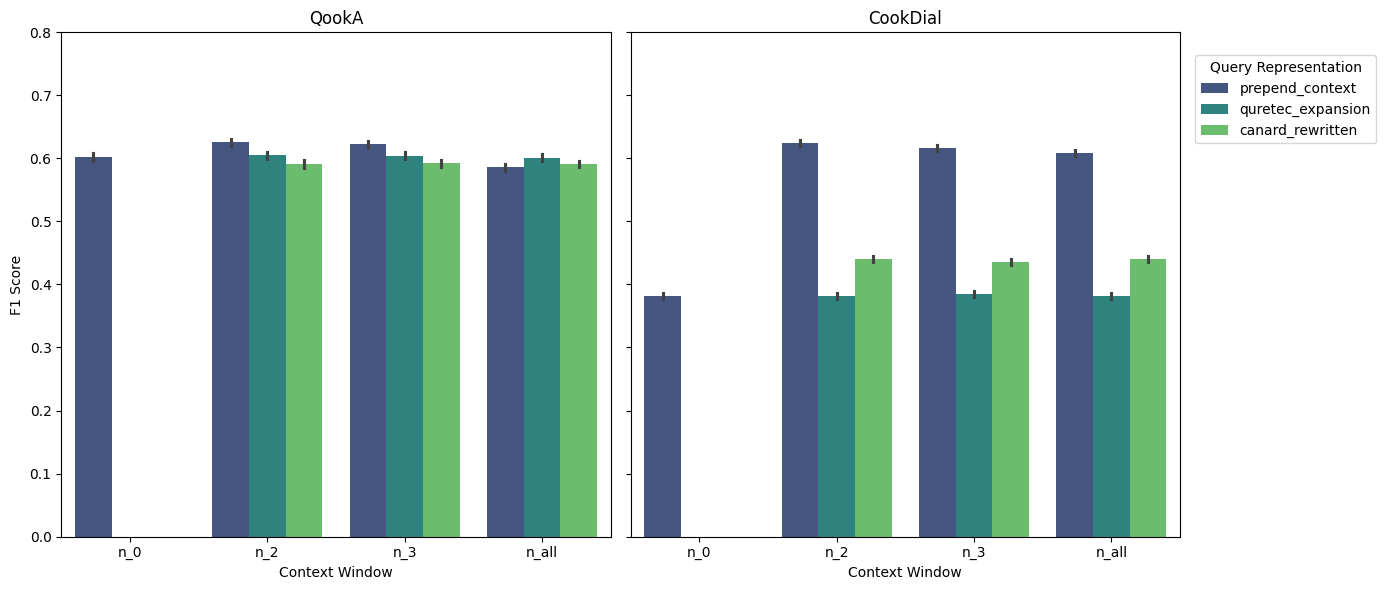

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming all_qooka_combined and all_cookdial_combined are defined and loaded with data
no_fid_all_qooka = all_qooka_combined.loc[all_qooka_combined['model_type'] != 'fid']
no_fid_all_cookdial = all_cookdial_combined.loc[all_cookdial_combined['model_type'] != 'fid']
# Your provided code for reshaping data
tidy_data_qooka = no_fid_all_qooka.melt(id_vars=['query_rep', 'context_window'], value_vars=['test_qa_answer_f1'])
tidy_data_cookdial = no_fid_all_cookdial.melt(id_vars=['query_rep', 'context_window'], value_vars=['test_qa_answer_f1'])

# Create subplots
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12, 6))  # Adjusted figsize for better visibility

# Plotting as bar plots
datasets = [('QookA', tidy_data_qooka), ('CookDial', tidy_data_cookdial)]
for i, (name, tidy_data) in enumerate(datasets):
    bplot = sns.barplot(data=tidy_data, x='context_window', y='value', hue='query_rep', ax=axs[i], errorbar=('ci', 95), palette='viridis')
    axs[i].set_title(f'{name}')
    axs[i].set_xlabel('Context Window')
    axs[i].set_ylabel('F1 Score')
    axs[i].set_ylim(0, 0.8)  # Adjust y-axis limits if needed

    # Remove the legend from each subplot
    axs[i].get_legend().remove()

# Create a single legend for the whole figure
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Query Representation', bbox_to_anchor=(1, .9), loc='upper left', borderaxespad=0.)

# Adjust layout
plt.tight_layout()  # Adjust the rect parameter to make space for the legend
#plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the rect parameter to make space for the legend
plt.savefig(f'figures/context_rep_amount.png', dpi=300, bbox_inches='tight')

plt.show()


## Dataset Need Distribution Overview

In [48]:
qooka_dataset = pd.read_csv("datasets/all_needs/qooka/queries/n_0/queries.csv",
                            delimiter=";")
qooka_dataset['level_0_query_need'].value_counts(normalize=True)*100

fact          50.264296
competence    49.735704
Name: level_0_query_need, dtype: float64

In [49]:
qooka_dataset['level_1_query_need'].value_counts(normalize=True)*100

preparation          35.031235
ingredient           21.143681
cooking_technique    14.704469
equipment            11.965401
time                  8.553580
temperature           4.324844
amount                3.940413
knowledge             0.336377
Name: level_1_query_need, dtype: float64

In [52]:
qooka_dataset['level_0_query_need'].value_counts()

fact          1046
competence    1035
Name: level_0_query_need, dtype: int64

In [50]:
cookdial_dataset = pd.read_csv("datasets/all_needs/cook_dial/queries/n_0/queries.csv",
                               delimiter=";")
cookdial_dataset['level_0_info_need'] = cookdial_dataset['intent'].map(lambda x: 'competence' if x == 'preparation'
                                                                          else 'other' if x == 'other'
                                                                          else 'fact')
cookdial_dataset['level_0_info_need'].value_counts(normalize=True)*100

competence    58.172147
fact          29.545455
other         12.282398
Name: level_0_info_need, dtype: float64

In [35]:
cookdial_dataset['intent'].value_counts(normalize=True)*100

preparation    58.172147
ingredient     19.801741
other          12.282398
time            4.134429
amount          4.134429
temperature     0.749516
equipment       0.725338
Name: intent, dtype: float64

In [53]:
cookdial_dataset['level_0_info_need'].value_counts()

competence    2406
fact          1222
other          508
Name: level_0_info_need, dtype: int64

In [54]:
len(qooka_dataset)

2081

In [55]:
len(cookdial_dataset)

4136

## Determening best model using BART, monoT5 > UQA, Llama 2

In [715]:
fact_needs_n2_qooka_bart_prepend_document_metrics = create_metrics_table('fact_needs','qooka', 'document','prepend_context','n_2','bart')
fact_needs_n2_qooka_t5_prepend_document_metrics = create_metrics_table('fact_needs','qooka', 'document','prepend_context','n_2','t5')
fact_needs_n2_qooka_llama2_prepend_document_metrics = create_metrics_table('fact_needs','qooka', 'document','prepend_context','n_2','llama2')

fact_needs_n2_qooka_fid_prepend_step_metrics = create_metrics_table('fact_needs','qooka', 'step','prepend_context','n_2','fid')
fact_needs_n2_qooka_monoqa_prepend_step_metrics = create_metrics_table('fact_needs','qooka', 'step','prepend_context','n_2','monoqa')
fact_needs_n2_qooka_monot5uqa_prepend_step_metrics = create_metrics_table('fact_needs','qooka', 'step','prepend_context','n_2','monot5uqa')

fact_needs_n2_qooka_fid_prepend_node_metrics = create_metrics_table('fact_needs','qooka', 'node','prepend_context','n_2','fid')
fact_needs_n2_qooka_monoqa_prepend_node_metrics = create_metrics_table('fact_needs','qooka', 'node','prepend_context','n_2','monoqa')
fact_needs_n2_qooka_monot5uqa_prepend_node_metrics = create_metrics_table('fact_needs','qooka', 'node','prepend_context','n_2','monot5uqa')

fact_needs_n2_cookdial_bart_prepend_document_metrics = create_metrics_table('fact_needs','cook_dial', 'document','prepend_context','n_2','bart')
fact_needs_n2_cookdial_t5_prepend_document_metrics = create_metrics_table('fact_needs','cook_dial', 'document','prepend_context','n_2','t5')
fact_needs_n2_cookdial_llama2_prepend_document_metrics = create_metrics_table('fact_needs','cook_dial', 'document','prepend_context','n_2','llama2')

fact_needs_n2_cookdial_fid_prepend_step_metrics = create_metrics_table('fact_needs','cook_dial', 'step','prepend_context','n_2','fid')
fact_needs_n2_cookdial_monoqa_prepend_step_metrics = create_metrics_table('fact_needs','cook_dial', 'step','prepend_context','n_2','monoqa')
fact_needs_n2_cookdial_monot5uqa_prepend_step_metrics = create_metrics_table('fact_needs','cook_dial', 'step','prepend_context','n_2','monot5uqa')

fact_needs_n2_cookdial_fid_prepend_node_metrics = create_metrics_table('fact_needs','cook_dial', 'node','prepend_context','n_2','fid')
fact_needs_n2_cookdial_monoqa_prepend_node_metrics = create_metrics_table('fact_needs','cook_dial', 'node','prepend_context','n_2','monoqa')
fact_needs_n2_cookdial_monot5uqa_prepend_node_metrics = create_metrics_table('fact_needs','cook_dial', 'node','prepend_context','n_2','monot5uqa')

### QookA

#### Document

In [688]:
print("BART")
fact_needs_n2_qooka_bart_prepend_document_metrics.mean(numeric_only=True)

BART


test_qa_answer_f1     0.449208
test_qa_bert_score    0.841840
test_qa_em            0.325048
test_qa_sas           0.493935
dtype: float64

In [689]:
print("T5")
fact_needs_n2_qooka_t5_prepend_document_metrics.mean(numeric_only=True)

T5


test_qa_answer_f1     0.549803
test_qa_bert_score    0.865695
test_qa_em            0.403442
test_qa_sas           0.584576
dtype: float64

In [704]:
print("LLama 2")
fact_needs_n2_qooka_llama2_prepend_document_metrics.mean(numeric_only=True)

LLama 2


bertscore_testing    0.789804
em_testing           0.237094
f1_score_testing     0.452796
sas_testing          0.554143
dtype: float64

#### Step

In [690]:
print("FiD")
fact_needs_n2_qooka_fid_prepend_step_metrics.mean(numeric_only=True)

FiD


test_qa_answer_f1     0.654914
test_qa_bert_score    0.898999
test_qa_em            0.544933
test_qa_sas           0.676650
dtype: float64

In [691]:
print("monoQA")
fact_needs_n2_qooka_monoqa_prepend_step_metrics.mean(numeric_only=True)

monoQA


test_qa_answer_f1     0.620069
test_qa_bert_score    0.881308
test_qa_em            0.479924
test_qa_sas           0.645594
dtype: float64

In [716]:
print("monoT5UQA")
fact_needs_n2_qooka_monot5uqa_prepend_step_metrics.mean(numeric_only=True)

monoT5UQA


test_qa_answer_f1     0.419365
test_qa_bert_score    0.803975
test_qa_em            0.259082
test_qa_sas           0.464928
dtype: float64

#### Task

In [692]:
print("FiD")

fact_needs_n2_qooka_fid_prepend_node_metrics.mean(numeric_only=True)

FiD


test_qa_answer_f1     0.679863
test_qa_bert_score    0.903290
test_qa_em            0.564054
test_qa_sas           0.700400
dtype: float64

In [693]:
print("monoQA")
fact_needs_n2_qooka_monoqa_prepend_node_metrics.mean(numeric_only=True)

monoQA


test_qa_answer_f1     0.667438
test_qa_bert_score    0.900748
test_qa_em            0.542065
test_qa_sas           0.685883
dtype: float64

In [717]:
print("monoT5 > UQA")
fact_needs_n2_qooka_monot5uqa_prepend_node_metrics.mean(numeric_only=True)

monoT5 > UQA


test_qa_answer_f1     0.412383
test_qa_bert_score    0.803672
test_qa_em            0.276291
test_qa_sas           0.456664
dtype: float64

### CookDial

#### Document

In [705]:
print("BART")
fact_needs_n2_cookdial_bart_prepend_metrics.mean(numeric_only=True)


BART


test_qa_answer_f1     0.684746
test_qa_bert_score    0.901871
test_qa_em            0.639935
test_qa_sas           0.652215
dtype: float64

In [706]:
print("T5")
fact_needs_n2_cookdial_t5_prepend_metrics.mean(numeric_only=True)

T5


test_qa_answer_f1     0.669190
test_qa_bert_score    0.901164
test_qa_em            0.617840
test_qa_sas           0.636157
dtype: float64

In [708]:
print("Llama 2")
fact_needs_n2_cookdial_llama2_prepend_document_metrics.mean(numeric_only=True)

Llama 2


bertscore_testing    0.710024
em_testing           0.019640
f1_score_testing     0.121085
sas_testing          0.225394
dtype: float64

#### Step

In [709]:
print("MonoT5 > UQA")
fact_needs_n2_cookdial_monot5uqa_prepend_step_metrics.mean(numeric_only=True)

MonoT5 > UQA


test_qa_answer_f1     0.144239
test_qa_bert_score    0.718374
test_qa_em            0.028642
test_qa_sas           0.187973
dtype: float64

In [711]:
print("MonoQA")
fact_needs_n2_cookdial_monoqa_prepend_step_metrics.mean(numeric_only=True)

MonoQA


test_qa_answer_f1     0.539035
test_qa_bert_score    0.867368
test_qa_em            0.472177
test_qa_sas           0.508915
dtype: float64

In [712]:
print("FiD")
fact_needs_n2_cookdial_fid_prepend_step_metrics.mean(numeric_only=True)

FiD


test_qa_answer_f1     0.688228
test_qa_bert_score    0.904058
test_qa_em            0.640753
test_qa_sas           0.654173
dtype: float64

#### Task

In [718]:
print("MonoT5 > UQA")
fact_needs_n2_cookdial_monot5uqa_prepend_node_metrics.mean(numeric_only=True)

MonoT5 > UQA


test_qa_answer_f1     0.187885
test_qa_bert_score    0.739033
test_qa_em            0.031097
test_qa_sas           0.227289
dtype: float64

In [713]:
print("MonoQA")
fact_needs_n2_cookdial_monoqa_prepend_node_metrics.mean(numeric_only=True)

MonoQA


test_qa_answer_f1     0.669190
test_qa_bert_score    0.901164
test_qa_em            0.617840
test_qa_sas           0.636157
dtype: float64

In [714]:
print("FiD")
fact_needs_n2_cookdial_fid_prepend_node_metrics.mean(numeric_only=True)

FiD


test_qa_answer_f1     0.684746
test_qa_bert_score    0.901871
test_qa_em            0.639935
test_qa_sas           0.652215
dtype: float64